In [1]:
'''
Samuel Grant 2023

Working on understanding the track cuts in MeasureModuleEfficiency.py. 

'''

'\nSamuel Grant 2023\n\nWorking on understanding the track cuts in MeasureModuleEfficiency.py. \n\n'

In [2]:
# External
import os
import sys
import numpy as np
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches

# Internal
sys.path.append(os.path.abspath("../PyMacros"))
import Utils as ut
import PrintUtils as pr

In [3]:
# Plot2D 
def Plot2D(x, y, nbinsX=100, xmin=-1.0, xmax=1.0, nbinsY=100, ymin=-1.0, ymax=1.0, min_box_coords=None, max_box_coords=None, box_colour="w", title=None, xlabel=None, ylabel=None, fout="hist.png", log=False, cb=True, NDPI=300):

    # Filter out empty entries from x and y
    valid_indices = [i for i in range(len(x)) if np.any(x[i]) and np.any(y[i])]

    # Extract valid data points based on the indices
    x = [x[i] for i in valid_indices]
    y = [y[i] for i in valid_indices]

    # Check if the input arrays are not empty and have the same length
    if len(x) == 0 or len(y) == 0:
        print("Input arrays are empty.")
        return
    if len(x) != len(y):
        print("Input arrays x and y have different lengths.")
        return

    # Create 2D histogram
    hist, x_edges, y_edges = np.histogram2d(x, y, bins=[nbinsX, nbinsY], range=[[xmin, xmax], [ymin, ymax]])

    # Set up the plot
    fig, ax = plt.subplots()

    norm = colors.Normalize(vmin=0, vmax=np.max(hist))  
    if log: norm = colors.LogNorm(vmin=1, vmax=np.max(hist)) 

    # Plot the 2D histogram
    im = ax.imshow(hist.T, cmap='inferno', extent=[xmin, xmax, ymin, ymax], aspect='auto', origin='lower', norm=norm)  # , vmax=np.max(hist), norm=colors.LogNorm())
    # im = ax.imshow(hist.T, extent=[xmin, xmax, ymin, ymax], aspect='auto', origin='lower', vmax=np.max(hist))

    # Add colourbar
    if cb: plt.colorbar(im)

    # Draw a box if min_box_coords and max_box_coords are provided
    if min_box_coords and max_box_coords:
        x_min, y_min = min_box_coords
        x_max, y_max = max_box_coords
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, linestyle="--", edgecolor=box_colour, facecolor="none")
        ax.add_patch(rect)

    plt.title(title, fontsize=16, pad=10)
    plt.xlabel(xlabel, fontsize=14, labelpad=10)
    plt.ylabel(ylabel, fontsize=14, labelpad=10)

    ut.ScientificNotation(ax)

    plt.tight_layout()

    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    plt.show()
    
    plt.close()
    
    print("\n---> Written:\n\t", fout)

    return

In [4]:
def Plot2DOverlaySideBySide(side_by_side_hists_, nbinsX=100, xmin=None, xmax=None, nbinsY=100, ymin=None, ymax=None
                            , xlabels_=None, ylabels_=None, fout="hist_side_by_side.png"
                            , min_box_coords=None, max_box_coords=None, box_colour="w"
                            , log=False, cb=True, NDPI=300, legPos="best", includeBlack=False, legFontSize=12):
    
    
    # Create figure and axes (subplots side by side)
    num_hists = len(side_by_side_hists_)
    fig, axs_ = plt.subplots(1, num_hists, figsize=(6 * num_hists, 6), sharey=True)
    # Iterate over the histograms and axes
    for i, (data, ax) in enumerate(zip(side_by_side_hists_, axs_)):
        x, y, label = data

        # Filter out empty entries from x and y
        valid_indices = [i for i in range(len(x)) if np.any(x[i]) and np.any(y[i])]

        # Extract valid data points based on the indices
        x = [x[i] for i in valid_indices]
        y = [y[i] for i in valid_indices]

        # Create 2D histogram
        hist, x_edges, y_edges = np.histogram2d(x, y, bins=[nbinsX, nbinsY], range=[[xmin, xmax], [ymin, ymax]])

        # Set normalization
        norm = colors.Normalize(vmin=0, vmax=np.max(hist))
        if log:
            norm = colors.LogNorm(vmin=1, vmax=np.max(hist))
        
        # Plot 2D histogram
        im = ax.imshow(hist.T, cmap='inferno', extent=[xmin, xmax, ymin, ymax], aspect='auto', origin='lower', norm=norm)
        
        # Add colorbar if needed
        if cb: # and i == num_hists - 1:
            cbar = plt.colorbar(im, ax=ax)
            cbar.ax.tick_params(labelsize=14)

        # Draw a box if min_box_coords and max_box_coords are provided
        if min_box_coords and max_box_coords:
            x_min, y_min = min_box_coords
            x_max, y_max = max_box_coords
            rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, linestyle="--", edgecolor=box_colour, facecolor="none")
            ax.add_patch(rect)
        
        # Set axis labels and titles
        ax.set_xlabel(xlabels_[i], fontsize=14, labelpad=10)
        if len(set(ylabels_)) == 1:
            if i == 0:
                ax.set_ylabel(ylabels_[i], fontsize=14, labelpad=10)
        else:
            ax.set_ylabel(ylabels_[i], fontsize=14, labelpad=10)
        
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)

        ax.set_ylim(ymin, ymax)
        ax.set_xlim(xmin, xmax)
        # ax.tick_params(axis='z', labelsize=14)
        
        # Set title and legend
        ax.set_title(label, fontsize=16, pad=10)
    
    plt.tight_layout()
    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    plt.show()
    
    # Clear memory
    plt.close()
    
    print("\n---> Written:\n\t", fout)

In [5]:
def Plot1D(data, nbins=100, xmin=-1.0, xmax=1.0, title=None, xlabel=None, ylabel=None, fout="hist.png", legPos="best", log=False, stats=True, underOver=False, errors=False, NDPI=300):
    
    data = np.array(data)
    # data = np.flatten(data)

    # Create figure and axes
    fig, ax = plt.subplots()

    # Plot the histogram with outline
    counts, bin_edges, _ = ax.hist(data, bins=nbins, range=(xmin, xmax), histtype='step', edgecolor='black', linewidth=1.0, fill=False, density=False)

    # Log scale 
    if log:
        ax.set_yscale('log')
        
    # Set x-axis limits
    ax.set_xlim(xmin, xmax)

    # Calculate statistics
    N, mean, meanErr, stdDev, stdDevErr, underflows, overflows = ut.GetBasicStats(data, xmin, xmax)

    # # Create legend text
    legendText = f"Entries: {N}\nMean: {ut.Round(mean, 3)}\nStd Dev: {ut.Round(stdDev, 3)}"
    if errors: legendText = f"Entries: {N}\nMean: {ut.Round(mean, 3)}$\pm${ut.Round(meanErr, 1)}\nStd Dev: {ut.Round(stdDev, 3)}$\pm${ut.Round(stdDevErr, 1)}"
    if underOver: legendText += f"\nUnderflows: {underflows}\nOverflows: {overflows}"

    # Add legend to the plot
    if stats: ax.legend([legendText], loc=legPos, frameon=False, fontsize=13)

    ax.set_title(title, fontsize=15, pad=10)
    ax.set_xlabel(xlabel, fontsize=13, labelpad=10) 
    ax.set_ylabel(ylabel, fontsize=13, labelpad=10) 

    # Set font size of tick labels on x and y axes
    ax.tick_params(axis='x', labelsize=13)  # Set x-axis tick label font size
    ax.tick_params(axis='y', labelsize=13)  # Set y-axis tick label font size

    ut.ScientificNotation(ax)

    plt.tight_layout()

    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    plt.show()

    # Clear memory
    plt.close()

    print("\n---> Written:\n\t", fout)

    return

In [6]:
# Get data
fileName="/exp/mu2e/data/users/sgrant/CRVSim/CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.000/81168767/00/00000/nts.sgrant.CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.001205_00000014.root" #"/exp/mu2e/data/users/sgrant/CRVSim/CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.000/11946817/00/00038/nts.sgrant.CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.001205_00000006.root"
finTag = fileName.split('.')[-2] 
with uproot.open(fileName) as file:
    data_ = ut.GetData(file)

In [7]:
# Events at the end of the digitisation window get messed up
# Cut on start time 
def CutOnStartTime(arrays_, quiet=False): 
    if not quiet: print(f"\n---> Cutting on start time")
    startTimeCondition = ak.all(arrays_["crv"]["crvcoincs.timeStart"] <= 99500, axis=1)
    return arrays_[startTimeCondition]
    
# data_ = CutOnStartTime(data_)

In [8]:
# Filter particles
def FilterParticles(arrays_, particle, quiet=False):
    if not quiet: print(f"\n---> Filtering particles, keeping {particle}")
    
    muonCondition = ak.any((arrays_["crv"]["crvcoincsmc.pdgId"] == 13) | (arrays_["crv"]["crvcoincsmc.pdgId"] == -13), axis=1)
    if particle == "all":
        return arrays_
    elif particle == "muons": 
        return arrays_[muonCondition] 
    elif particle == "non_muons":
        return arrays_[~muonCondition] 
    else:
        raise ValueError(f"Particle string {particle} not valid!")

particle = "all"
# data_ = FilterParticles(data_, particle)

In [9]:
# Interesting event?
# pr.PrintNEvents(data_[(data_["evt"]["evtinfo.run"] == 1205) & (data_["evt"]["evtinfo.subrun"] == 6) & (data_["evt"]["evtinfo.event"] == 6837)])
# print(len(ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"])))
# test2_ = data_[(data_["evt"]["evtinfo.run"] == 1205) & (data_["evt"]["evtinfo.subrun"] == 6) & (data_["evt"]["evtinfo.event"] == 6837)]
# pr.PrintNEvents(test2_)

In [10]:
# Basic config 
recon="MDC2020ae"
PE=10
particle="all"
layer=3

In [11]:
# testing: tracker planes
# sid: integer identifying the surface the track intersection
# sindex: index enumerating intersections with this surface (if there are >1)
unique_sid = set(ak.flatten(data_["trkfit"]["klfit"]["sid"], axis=None))
unique_sindex = set(ak.flatten(data_["trkfit"]["klfit"]["sindex"], axis=None))
print(unique_sid, unique_sindex)

{0, 2, 4, 200} {0, 1, 2}


-------------------------------------------------------------------------------------
***** evt *****
evtinfo.run: 1205
evtinfo.subrun: 14
evtinfo.event: 92
***** crv *****
crvcoincs.sectorType: []
crvcoincs.nLayers []
crvcoincs.angle: []
crvcoincs.pos.fCoordinates: ([], [], [])
crvcoincs.timeStart: []
crvcoincs.time: []
crvcoincs.PEs: []
crvcoincs.PEsPerLayer[4]: []
crvcoincs.nHits: []
crvcoincsmc.pdgId: []
crvcoincsmc.valid: []
crvcoincsmc.primaryE: []
***** trk *****
kl.status: [1]
kl.nactive: [12]
kl.nhits: [13]
kl.nplanes: [5]
kl.nnullambig: [3]
kl.ndof: [19]
kl.kl.fitcon: [0.695]
***** trkfit *****
klfit: [[{mom: {fCoordinates: {...}}, pos: {...}, time: 3.46e+03, ...}, ..., {...}]]
klfit.sid: [[0, 2, 4, 4, 4, 200, 200, 200]]
klfit.sindex: [[0, 0, 0, 0, 0, 0, 1, 2]]
klkl: [[{d0: -153, phi0: -2.34, z0: -1.11e+03, theta: 2.36, mom: 2e+03, ...}, ...]]
klkl.z0err: [[0.371, 0.453, 0.453, 0.453, 0.371, 0.453, 0.453, 0.453]]
klkl.d0err: [[1.24, 1.24, 1.24, 1.24, 1.24, 1.24, 1.24, 1.24]]


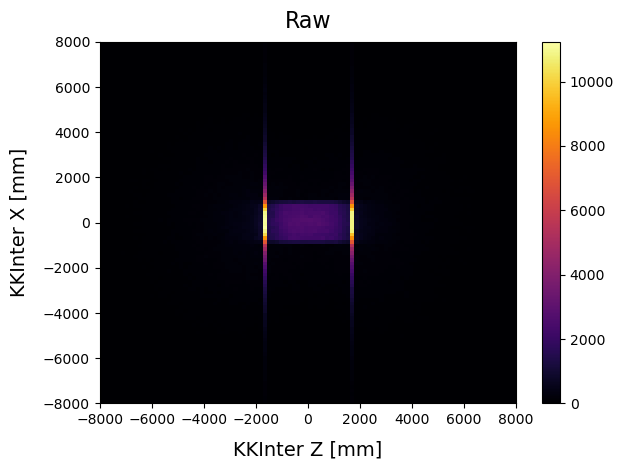


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_ZX_raw.png


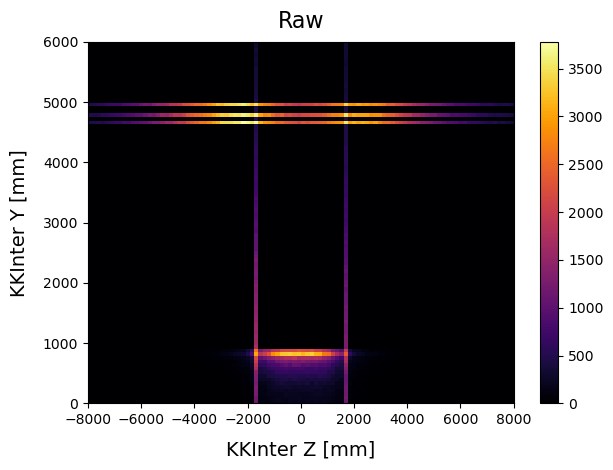


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_ZY_raw.png


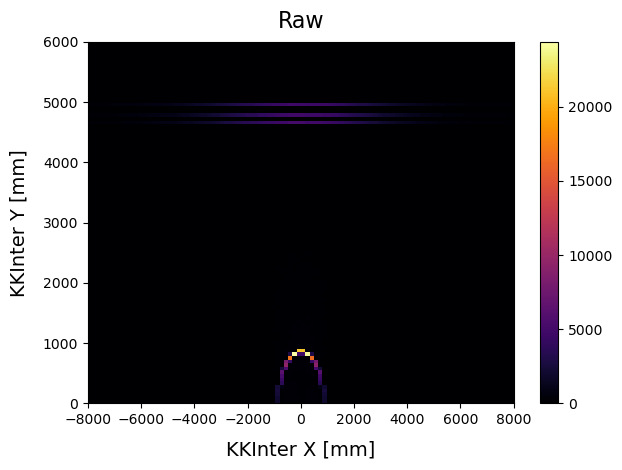


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_XY_raw.png


In [12]:
'''
Just raw data
'''
# sid=0
# # print(data_["trkfit"])
# data_["trkfit"] = data_["trkfit"][(data_["trkfit"]["klfit"]["sid"] == sid)]

ut.PrintNEvents(data_, 1)

length=-1

Plot2D(x=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
         , y=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
         , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
         # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
         , title="Raw", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
         , fout=f"../Images/{recon}/TrackCuts//h2_ZX_raw.png")

Plot2D(x=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
         , y=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[:length]
         , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
         # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
         , title="Raw", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
         , fout=f"../Images/{recon}/TrackCuts/h2_ZY_raw.png")

Plot2D(x=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
         , y=ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[:length]
         , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
         # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
         , title="Raw", xlabel="KKInter X [mm]", ylabel="KKInter Y [mm]"
         , fout=f"../Images/{recon}/TrackCuts//h2_XY_raw.png")

In [13]:
def ApplyTrackerCuts(arrays_, fail=False, triggerMode="none", quiet=False):
    
    if not quiet: print(f"\n---> Applying tracker cuts") 

    # Mark cuts on the track and track fit level
    arrays_["trkfit_KLCRV1"] = ( 
        (arrays_["trkfit"]["klfit"]["sid"] == 200) 
        & (arrays_["trkfit"]["klfit"]["sindex"] == 1) )

    arrays_["trk_bestFit"] = ( 
        (arrays_["trk"]["kl.ndof"] >= 10)
        & (arrays_["trk"]["kl.fitcon"] > 0.1)
        & ((arrays_["trk"]["kl.nactive"]/arrays_["trk"]["kl.nhits"]) > 0.99)
        & (arrays_["trk"]["kl.nplanes"] >= 4)
        & ((arrays_["trk"]["kl.nnullambig"]/arrays_["trk"]["kl.nhits"]) < 0.2) )
    
    arrays_["trkfit_bestFit"] = ( 
        (arrays_["trkfit"]["klkl"]["z0err"] < 1) 
        & (arrays_["trkfit"]["klkl"]["d0err"] < 1) 
        & (arrays_["trkfit"]["klkl"]["thetaerr"] < 0.004)
        & (arrays_["trkfit"]["klkl"]["phi0err"] < 0.001) )

    ###### Fiducial area ######

    # Dimensions from crv_parameters.xlsx
    # CRV-T module overall length 6100 mm
    # CRV-T module overall width 951.0 mm 
    # CRV-DS length = 2570 mm
    # CRV-DS width = 826 mm 
    # CRV-L-end length = 3388 mm
    # CRV-L-end width = 951 mm 
    
    # Total layer offset 42.00*(4-1) = 127 mm
    # Four modules side-by-side w_tot = w + (N_mod-1)*(w_mod-off) 
        
    # CRV-T
    # width ---> 951 + (4-1)*(951-127) = 3388
    # z: 3388/2 (offset by -500 mm) 
    # x: 6100/2 
    # (z, x)
    # min_box_coords = (-3388/2-500, -6100/2)
    # max_box_coords = (3388/2-500, 6100/2)
    
    # CRV-DS
    # width ---> 826 + (2-1)*(826-127) = 1525
    # It is rotated. length -> width. 
    # z-coords is length for DS 
    # z: 2570/2 (offset by -500 mm) 
    # x: 1525/2 
    # (z, x)
    # min_box_coords = (-2570/2-500, -1525/2)
    # max_box_coords = (2570/2-500, +1525/2)

    # CRV-L-end
    # width ---> 951 + (2-1)*(951-127) = 1775
    # z-coords is length for DS 
    # z: 1775/2 (offset by -500 mm) 
    # x: 3388/2  
    # (z, x)
    # min_box_coords = (-(1775/2)-500, -(3388/2))
    # max_box_coords = (+(1775/2)-500, +(3388/2))

    # Trigger modules 
    # In z:
    # CRV-L-end width < CRV-DS length
    
    # In x:
    # CRV-L-end length > CRV-DS width
    
    # So the box is defined by:
    # z: CRV-DS length (2570/2) 
    # x: CRV-L-end length (3388/2) 
    # (z, x)
    # min_box_coords = (-(2570/2)-500, -(3388/2))
    # max_box_coords = (+(2570/2)-500, +(3388/2))
    
    # Measurement module
    arrays_["trkfit_CRV1Fiducial"] = ( 
        (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"]) < 6100/2) 
        & (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"] + 500) < 3423/2))

    # Trigger modules
    arrays_["trkfit_CRV23Fiducial"] = ( 
        (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"]) < 3388/2)
        & (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"] + 500) < 2570/2) ) 

    # CRV-DS 
    arrays_["trkfit_CRV2Fiducial"] = ( 
        (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"]) < 1525/2)
        & (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"] + 500) < 2570/2) ) 

    # CRV-L-end
    arrays_["trkfit_CRV3Fiducial"] = ( 
        (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"]) < 3388/2)
        & (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"] + 500) < 1775/2) ) 

    ################################################
    
    # Track condition 
    trkCondition = arrays_["trk_bestFit"]

    # Track fit (segments) condition (default has no area cut)
    trkFitCondition = (arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"]) 

    # Modes: 
    # 1. CRV-DS and CRV-L trigger, crv_trigger 
    # 2. CRV-DS trigger, crv2_trigger 
    # 3. CRV-L-end trigger, crv3_trigger 
    # 4. Tracker trigger, trk_trigger
    # 5. CRV and tracker trigger, trk_crv_trigger
    # 6. CRV-DS and tracker trigger, trk_crv2_trigger
    # 7. CRV-L-end and tracker trigger, trk_crv3_trigger
    
    if triggerMode in ["crv_trigger", "trk_crv_trigger"]: 
        trkFitCondition = (arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"] & arrays_["trkfit_CRV23Fiducial"])
    elif triggerMode in ["crv2_trigger", "trk_crv2_trigger"]:
        trkFitCondition = (arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"] & arrays_["trkfit_CRV2Fiducial"])
    elif triggerMode in ["crv3_trigger", "trk_crv3_trigger"]:
        trkFitCondition = (arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"] & arrays_["trkfit_CRV3Fiducial"]) 
    elif triggerMode == "trk_trigger":
        trkFitCondition = (arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"] & arrays_["trkfit_CRV1Fiducial"]) 
    else: 
        print(f"---> triggerMode: '{triggerMode}'... no fiducial area cut used.")
        
    if not fail: 
        # Create masks
        arrays_["trkfit"] = arrays_["trkfit"][trkFitCondition] # (arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"] & arrays_["trkfit_CRV23Fiducial"])]
        arrays_["trk"] = arrays_["trk"][trkCondition] # arrays_["trk_bestFit"]]
    else: 
        # Create masks
        arrays_["trkfit"] = arrays_["trkfit"][~trkFitCondition] # (arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"] & arrays_["trkfit_CRV23Fiducial"])]
        arrays_["trk"] = arrays_["trk"][~trkCondition] # arrays_["trk_bestFit"]]

    # Check for a track in the event after cuts.
    trkCut = ak.any(arrays_["trk"]["kl.status"], axis=1, keepdims=False) > 0 
    # Check for a track fit in the event after cuts
    trkFitCut = (
        (ak.count(arrays_["trkfit"]["klfit"]["sid"], axis=-1, keepdims=False) > 0) 
        & (ak.count(arrays_["trkfit"]["klkl"]["z0err"], axis=-1, keepdims=False) > 0) )
    
    # Reset to event level
    trkFitCut = ak.any(trkFitCut, axis=-1, keepdims=False) == True 

    # Real function splits this part into a seperater function 
    # Both do the same thing, but mark them pass/fail for bookkeeping.
    if not fail: 
        arrays_["pass_track_cuts"] = (trkCut & trkFitCut)
        return arrays_[arrays_["pass_track_cuts"]]
    else: 
        arrays_["fail_track_cuts"] = (trkCut & trkFitCut)
        return arrays_[arrays_["fail_track_cuts"]]


---> Applying tracker cuts
---> triggerMode: 'none'... no fiducial area cut used.
-------------------------------------------------------------------------------------
***** evt *****
evtinfo.run: 1205
evtinfo.subrun: 14
evtinfo.eventid: 295
***** crv *****
crvcoincs.sectorType: []
crvcoincs.nLayers []
crvcoincs.angle: []
crvcoincs.pos.fCoordinates: ([], [], [])
crvcoincs.timeStart: []
crvcoincs.time: []
crvcoincs.PEs: []
crvcoincs.PEsPerLayer[4]: []
crvcoincs.nHits: []
crvcoincsmc.pdgId: []
crvcoincsmc.valid: []
crvcoincsmc.primaryE: []
***** trk *****
kl.status: [1]
kl.nactive: [23]
kl.nhits: [23]
kl.nplanes: [9]
kl.nnullambig: [1]
kl.ndof: [41]
kl.kl.fitcon: [0.667]
***** trkfit *****
klfit: [[{mom: {fCoordinates: {...}}, pos: {...}, time: 6.86e+04, momerr: ..., ...}]]
klfit.sid: [[200]]
klfit.sindex: [[1]]
klfit.time: [[6.86e+04]]
klkl: [[{d0: -68.9, phi0: -0.791, z0: -638, theta: 2.49, mom: 2e+03, t0: ..., ...}]]
klkl.z0err: [[0.382]]
klkl.d0err: [[0.255]]
klkl.thetaerr: [[0.0002

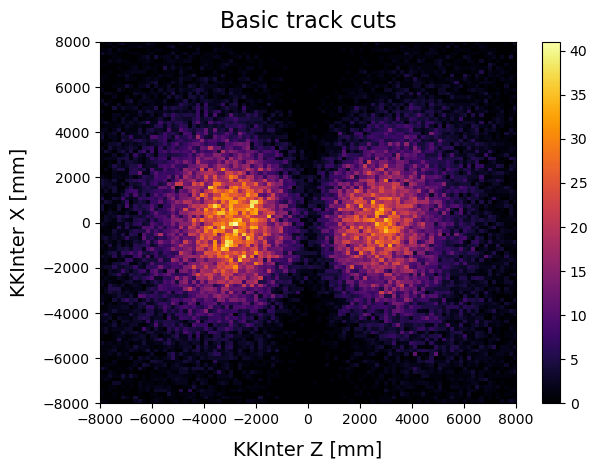


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_ZX_basic_track_cutss.png


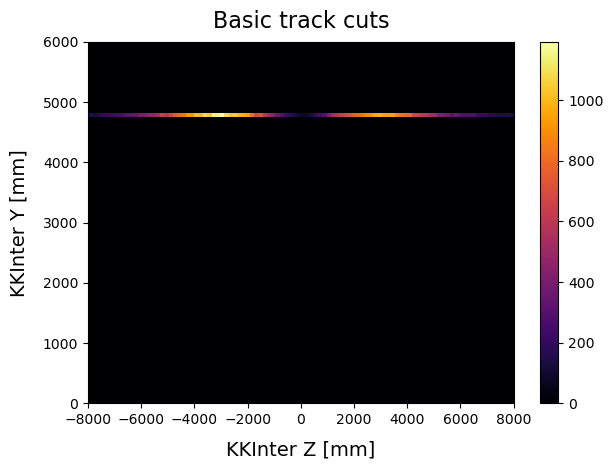


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_ZY_basic_track_cuts.png


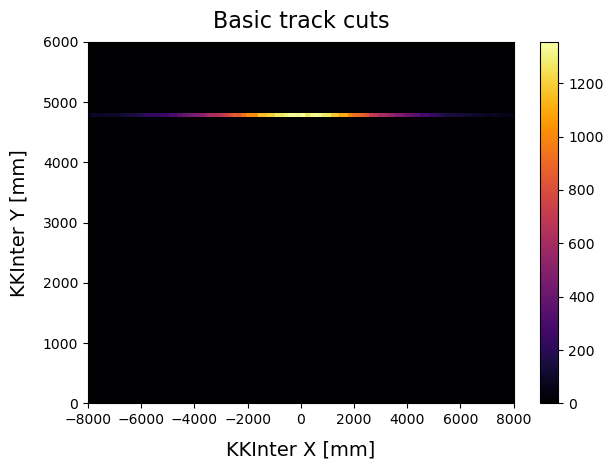


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_XY_basic_track_cuts.png


In [14]:
'''
Basic track cuts
'''

track_cuts_ = ak.copy(data_)
track_cuts_ = ApplyTrackerCuts(track_cuts_, fail=False)

pr.PrintNEvents(track_cuts_, 1, masks_ = ["pass_track_cuts", "trk_bestFit", "trkfit_bestFit", "trkfit_KLCRV1", ] ) 

Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
       # , min_box_coords=min_box_coords, max_box_coords=max_box_coords
       , title="Basic track cuts", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
       , fout=f"../Images/{recon}/TrackCuts/h2_ZX_basic_track_cutss.png")

Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Basic track cuts", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
       , fout=f"../Images/{recon}/TrackCuts/h2_ZY_basic_track_cuts.png")

Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
       , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
       , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
       # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
       , title="Basic track cuts", xlabel="KKInter X [mm]", ylabel="KKInter Y [mm]"
       , fout=f"../Images/{recon}/TrackCuts/h2_XY_basic_track_cuts.png")


---> Applying tracker cuts


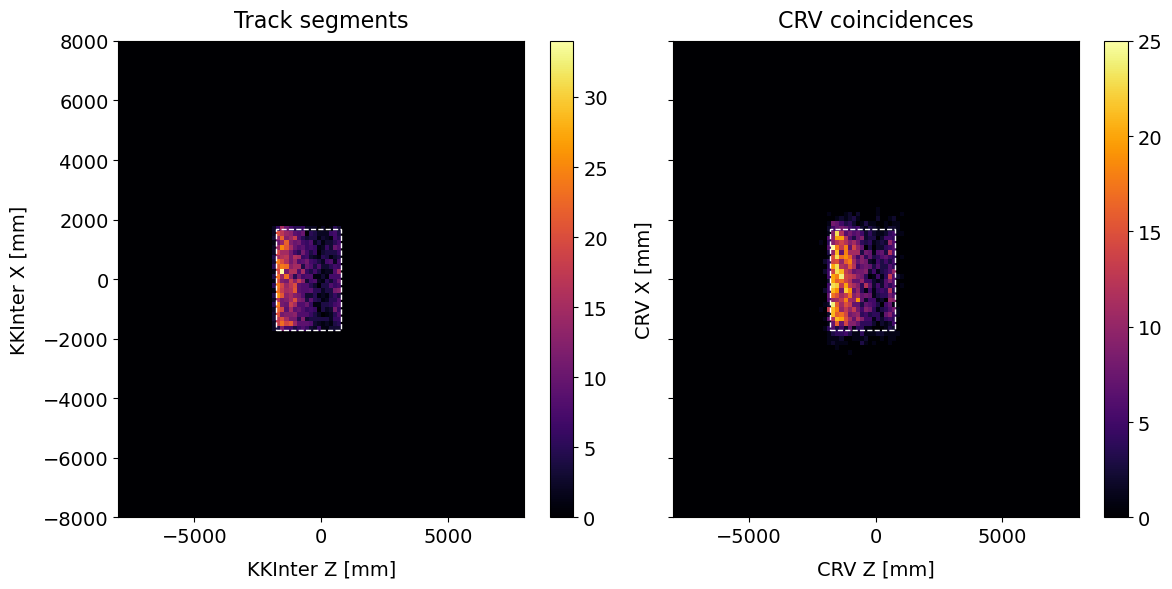


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_sbs_XZ_crv_trigger.png

---> Applying tracker cuts


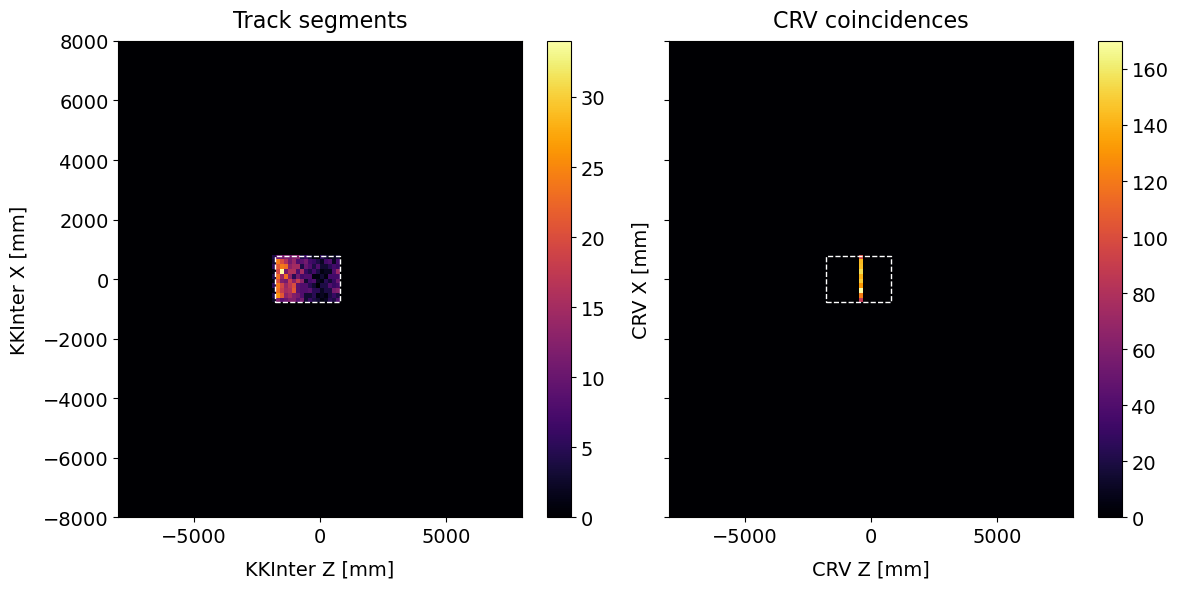


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_sbs_XZ_crv2_trigger.png

---> Applying tracker cuts


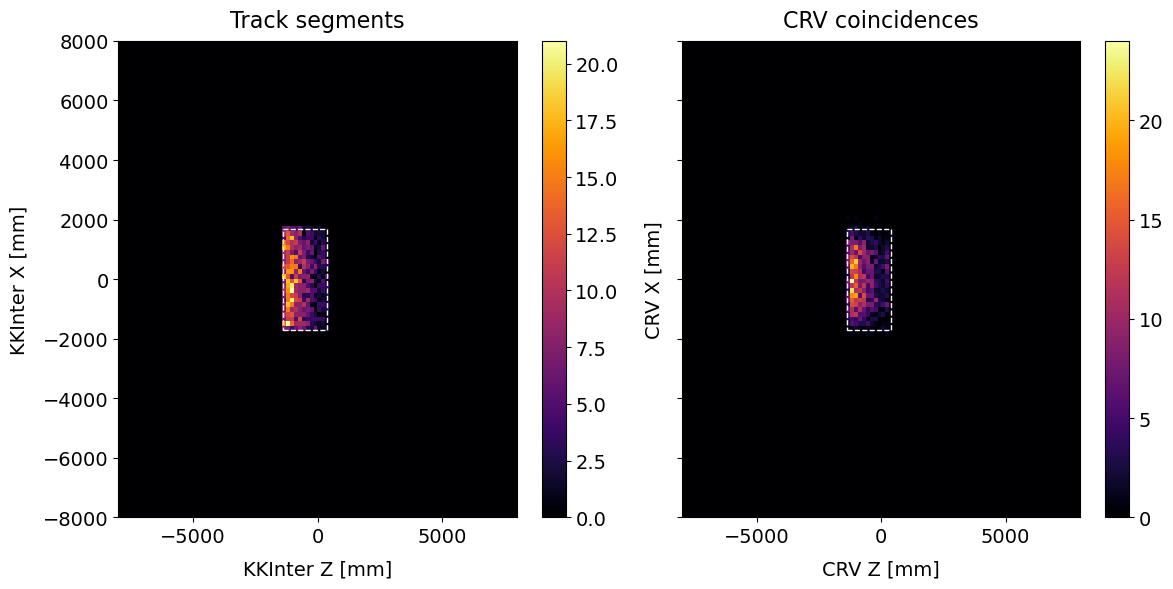


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_sbs_XZ_crv3_trigger.png

---> Applying tracker cuts


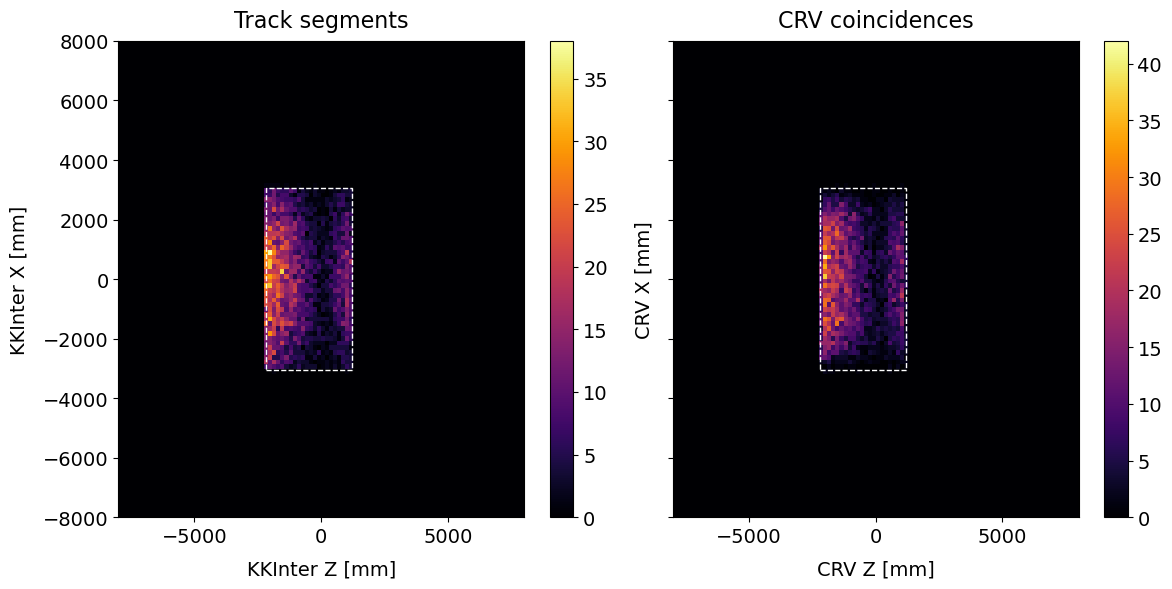


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_sbs_XZ_trk_trigger.png

---> Applying tracker cuts


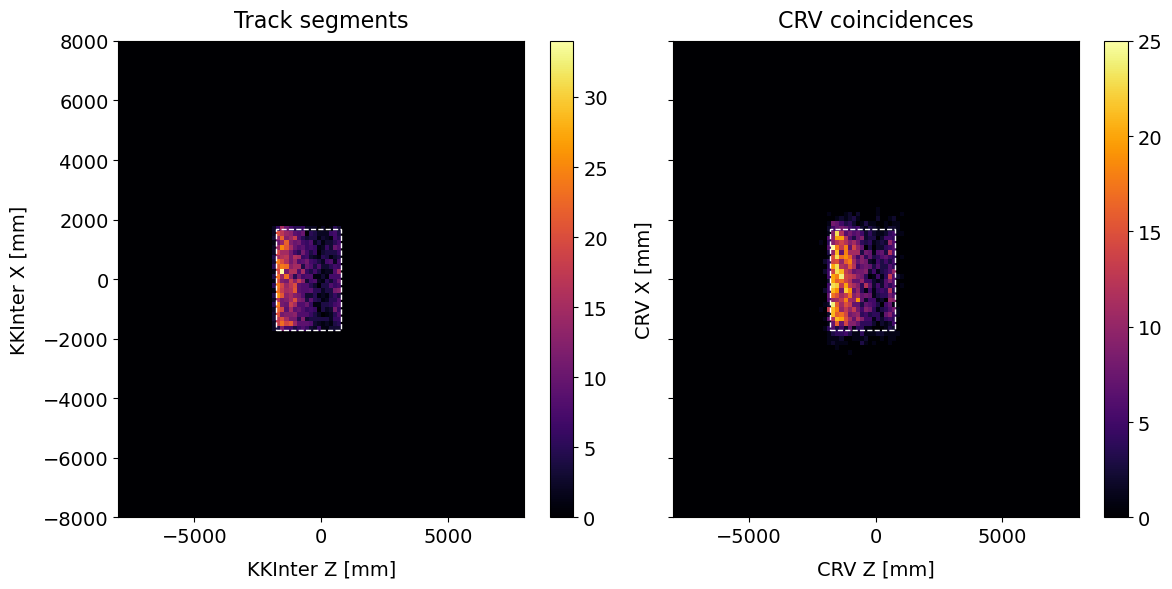


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_sbs_XZ_trk_crv_trigger.png

---> Applying tracker cuts


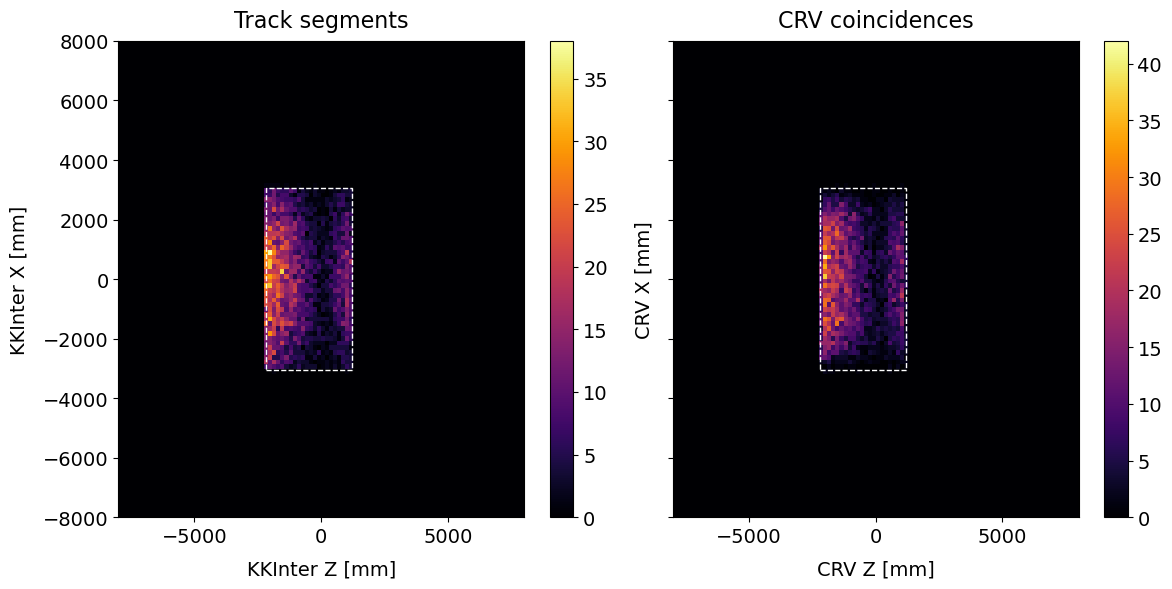


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_sbs_XZ_trk_trigger.png

---> Applying tracker cuts


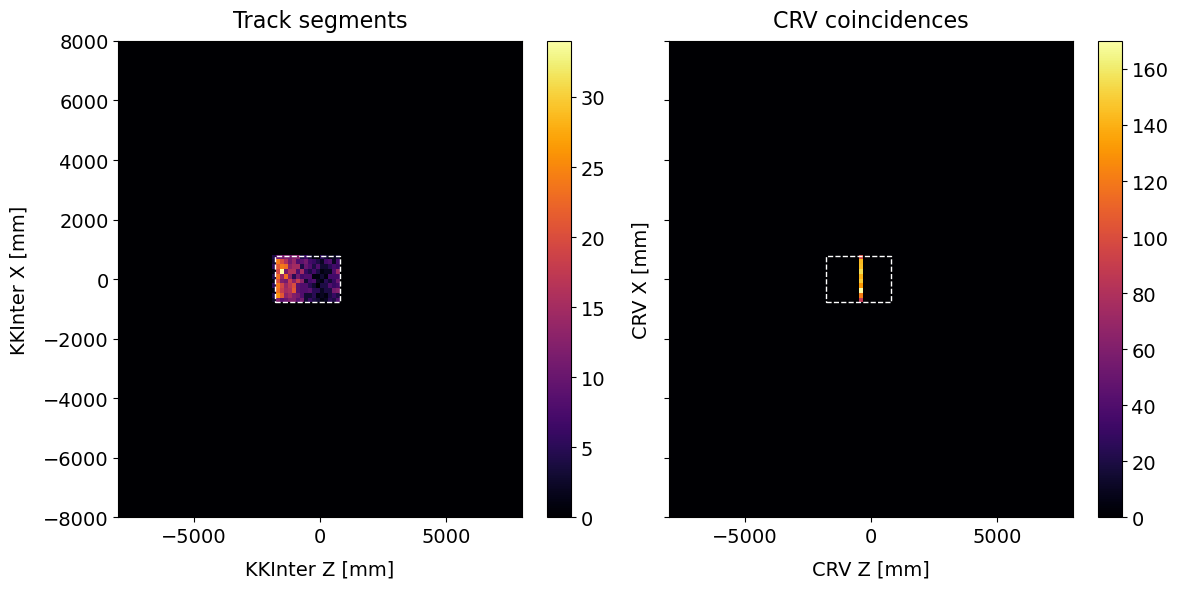


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_sbs_XZ_trk_crv2_trigger.png

---> Applying tracker cuts


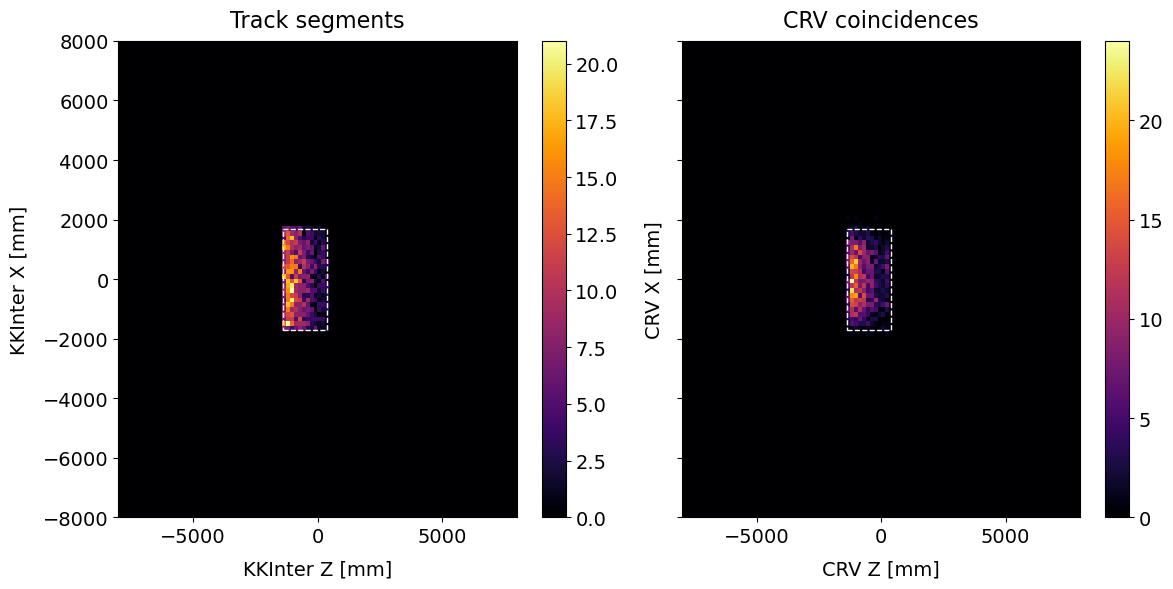


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_sbs_XZ_trk_crv3_trigger.png


In [15]:
'''
Testing trigger modes

    # Modes: 
    # 1. CRV-DS and CRV-L trigger, crv_trigger 
    # 2. CRV-DS trigger, crv2_trigger 
    # 3. CRV-L-end trigger, crv3_trigger 
    # 4. Tracker trigger, trk_trigger
    # 5. CRV and tracker trigger, trk_crv_trigger
    # 6. CRV-DS and tracker trigger, trk_crv2_trigger
    # 7. CRV-L-end and tracker trigger, trk_crv3_trigger
    
'''

# 1 crv_trigger 

this_data_ = ak.copy(data_)
this_data_ = ApplyTrackerCuts(this_data_, triggerMode="crv_trigger", fail=False)

# pr.PrintNEvents(this_data_, 1, masks_ = ["pass_track_cuts", "trk_bestFit", "trkfit_bestFit", "trkfit_KLCRV1", "trkfit_CRV23Fiducial"] ) 

sector1Condition = this_data_["crv"]["crvcoincs.sectorType"] == 1

side_by_side_hists_ = [
    (ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None), ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None), "Track segments")
    ,(ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sector1Condition], axis=None), ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fX"][sector1Condition], axis=None), "CRV coincidences")
]

min_box_coords = (-(2570/2)-500, -(3388/2))
max_box_coords = (+(2570/2)-500, +(3388/2))

Plot2DOverlaySideBySide(
    side_by_side_hists_=side_by_side_hists_,
    nbinsX=100,
    xmin=-8000, xmax=8000,
    nbinsY=100,
    ymin=-8000, ymax=8000,
    min_box_coords=min_box_coords, max_box_coords=max_box_coords,
    xlabels_=["KKInter Z [mm]", "CRV Z [mm]"],
    ylabels_=["KKInter X [mm]", "CRV X [mm]"],
    fout=f"../Images/{recon}/TrackCuts/h2_sbs_XZ_crv_trigger.png",
    log=False,
    cb=True,
    NDPI=300,
    legFontSize=12
)

# 2 crv2_trigger 

this_data_ = ak.copy(data_)
this_data_ = ApplyTrackerCuts(this_data_, triggerMode="crv2_trigger", fail=False)

# pr.PrintNEvents(this_data_, 1, masks_ = ["pass_track_cuts", "trk_bestFit", "trkfit_bestFit", "trkfit_KLCRV1", "trkfit_CRV23Fiducial"] ) 

sector1Condition = this_data_["crv"]["crvcoincs.sectorType"] == 2

side_by_side_hists_ = [
    (ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None), ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None), "Track segments")
    ,(ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sector1Condition], axis=None), ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fX"][sector1Condition], axis=None), "CRV coincidences")
]

min_box_coords = (-2570/2-500, -1525/2)
max_box_coords = (2570/2-500, +1525/2)

Plot2DOverlaySideBySide(
    side_by_side_hists_=side_by_side_hists_,
    nbinsX=100,
    xmin=-8000, xmax=8000,
    nbinsY=100,
    ymin=-8000, ymax=8000,
    min_box_coords=min_box_coords, max_box_coords=max_box_coords,
    xlabels_=["KKInter Z [mm]", "CRV Z [mm]"],
    ylabels_=["KKInter X [mm]", "CRV X [mm]"],
    fout=f"../Images/{recon}/TrackCuts/h2_sbs_XZ_crv2_trigger.png",
    log=False,
    cb=True,
    NDPI=300,
    legFontSize=12
)

# 3 crv3_trigger 

this_data_ = ak.copy(data_)
this_data_ = ApplyTrackerCuts(this_data_, triggerMode="crv3_trigger", fail=False)

# pr.PrintNEvents(this_data_, 1, masks_ = ["pass_track_cuts", "trk_bestFit", "trkfit_bestFit", "trkfit_KLCRV1", "trkfit_CRV23Fiducial"] ) 

sector1Condition = this_data_["crv"]["crvcoincs.sectorType"] == 3

side_by_side_hists_ = [
    (ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None), ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None), "Track segments")
    ,(ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sector1Condition], axis=None), ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fX"][sector1Condition], axis=None), "CRV coincidences")
]

min_box_coords = (-(1775/2)-500, -(3388/2))
max_box_coords = (+(1775/2)-500, +(3388/2))

Plot2DOverlaySideBySide(
    side_by_side_hists_=side_by_side_hists_,
    nbinsX=100,
    xmin=-8000, xmax=8000,
    nbinsY=100,
    ymin=-8000, ymax=8000,
    min_box_coords=min_box_coords, max_box_coords=max_box_coords,
    xlabels_=["KKInter Z [mm]", "CRV Z [mm]"],
    ylabels_=["KKInter X [mm]", "CRV X [mm]"],
    fout=f"../Images/{recon}/TrackCuts/h2_sbs_XZ_crv3_trigger.png",
    log=False,
    cb=True,
    NDPI=300,
    legFontSize=12
)

# 4. Tracker trigger, trk_trigger

this_data_ = ak.copy(data_)
this_data_ = ApplyTrackerCuts(this_data_, triggerMode="trk_trigger", fail=False)

# pr.PrintNEvents(this_data_, 1, masks_ = ["pass_track_cuts", "trk_bestFit", "trkfit_bestFit", "trkfit_KLCRV1", "trkfit_CRV23Fiducial"] ) 

sector1Condition = this_data_["crv"]["crvcoincs.sectorType"] == 1

side_by_side_hists_ = [
    (ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None), ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None), "Track segments")
    ,(ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sector1Condition], axis=None), ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fX"][sector1Condition], axis=None), "CRV coincidences")
]

min_box_coords = (-3388/2-500, -6100/2)
max_box_coords = (3388/2-500, 6100/2)

Plot2DOverlaySideBySide(
    side_by_side_hists_=side_by_side_hists_,
    nbinsX=100,
    xmin=-8000, xmax=8000,
    nbinsY=100,
    ymin=-8000, ymax=8000,
    min_box_coords=min_box_coords, max_box_coords=max_box_coords,
    xlabels_=["KKInter Z [mm]", "CRV Z [mm]"],
    ylabels_=["KKInter X [mm]", "CRV X [mm]"],
    fout=f"../Images/{recon}/TrackCuts/h2_sbs_XZ_trk_trigger.png",
    log=False,
    cb=True,
    NDPI=300,
    legFontSize=12
)

# 4. Tracker and CRV trigger, trk_crv_trigger

this_data_ = ak.copy(data_)
this_data_ = ApplyTrackerCuts(this_data_, triggerMode="trk_crv_trigger", fail=False)

# pr.PrintNEvents(this_data_, 1, masks_ = ["pass_track_cuts", "trk_bestFit", "trkfit_bestFit", "trkfit_KLCRV1", "trkfit_CRV23Fiducial"] ) 

sector1Condition = this_data_["crv"]["crvcoincs.sectorType"] == 1

side_by_side_hists_ = [
    (ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None), ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None), "Track segments")
    ,(ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sector1Condition], axis=None), ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fX"][sector1Condition], axis=None), "CRV coincidences")
]

min_box_coords = (-(2570/2)-500, -(3388/2))
max_box_coords = (+(2570/2)-500, +(3388/2))

Plot2DOverlaySideBySide(
    side_by_side_hists_=side_by_side_hists_,
    nbinsX=100,
    xmin=-8000, xmax=8000,
    nbinsY=100,
    ymin=-8000, ymax=8000,
    min_box_coords=min_box_coords, max_box_coords=max_box_coords,
    xlabels_=["KKInter Z [mm]", "CRV Z [mm]"],
    ylabels_=["KKInter X [mm]", "CRV X [mm]"],
    fout=f"../Images/{recon}/TrackCuts/h2_sbs_XZ_trk_crv_trigger.png",
    log=False,
    cb=True,
    NDPI=300,
    legFontSize=12
)

# 5. Tracker trigger, trk_trigger

this_data_ = ak.copy(data_)
this_data_ = ApplyTrackerCuts(this_data_, triggerMode="trk_trigger", fail=False)

# pr.PrintNEvents(this_data_, 1, masks_ = ["pass_track_cuts", "trk_bestFit", "trkfit_bestFit", "trkfit_KLCRV1", "trkfit_CRV23Fiducial"] ) 

sector1Condition = this_data_["crv"]["crvcoincs.sectorType"] == 1

side_by_side_hists_ = [
    (ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None), ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None), "Track segments")
    ,(ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sector1Condition], axis=None), ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fX"][sector1Condition], axis=None), "CRV coincidences")
]

min_box_coords = (-3388/2-500, -6100/2)
max_box_coords = (3388/2-500, 6100/2)

Plot2DOverlaySideBySide(
    side_by_side_hists_=side_by_side_hists_,
    nbinsX=100,
    xmin=-8000, xmax=8000,
    nbinsY=100,
    ymin=-8000, ymax=8000,
    min_box_coords=min_box_coords, max_box_coords=max_box_coords,
    xlabels_=["KKInter Z [mm]", "CRV Z [mm]"],
    ylabels_=["KKInter X [mm]", "CRV X [mm]"],
    fout=f"../Images/{recon}/TrackCuts/h2_sbs_XZ_trk_trigger.png",
    log=False,
    cb=True,
    NDPI=300,
    legFontSize=12
)

# 6 trk_crv2_trigger

this_data_ = ak.copy(data_)
this_data_ = ApplyTrackerCuts(this_data_, triggerMode="trk_crv2_trigger", fail=False)

# pr.PrintNEvents(this_data_, 1, masks_ = ["pass_track_cuts", "trk_bestFit", "trkfit_bestFit", "trkfit_KLCRV1", "trkfit_CRV23Fiducial"] ) 

sector1Condition = this_data_["crv"]["crvcoincs.sectorType"] == 2

side_by_side_hists_ = [
    (ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None), ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None), "Track segments")
    ,(ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sector1Condition], axis=None), ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fX"][sector1Condition], axis=None), "CRV coincidences")
]

min_box_coords = (-2570/2-500, -1525/2)
max_box_coords = (2570/2-500, +1525/2)

Plot2DOverlaySideBySide(
    side_by_side_hists_=side_by_side_hists_,
    nbinsX=100,
    xmin=-8000, xmax=8000,
    nbinsY=100,
    ymin=-8000, ymax=8000,
    min_box_coords=min_box_coords, max_box_coords=max_box_coords,
    xlabels_=["KKInter Z [mm]", "CRV Z [mm]"],
    ylabels_=["KKInter X [mm]", "CRV X [mm]"],
    fout=f"../Images/{recon}/TrackCuts/h2_sbs_XZ_trk_crv2_trigger.png",
    log=False,
    cb=True,
    NDPI=300,
    legFontSize=12
)

# 7 trk_crv3_trigger

this_data_ = ak.copy(data_)
this_data_ = ApplyTrackerCuts(this_data_, triggerMode="trk_crv3_trigger", fail=False)

# pr.PrintNEvents(this_data_, 1, masks_ = ["pass_track_cuts", "trk_bestFit", "trkfit_bestFit", "trkfit_KLCRV1", "trkfit_CRV23Fiducial"] ) 

sector1Condition = this_data_["crv"]["crvcoincs.sectorType"] == 3

side_by_side_hists_ = [
    (ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None), ak.flatten(this_data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None), "Track segments")
    ,(ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sector1Condition], axis=None), ak.flatten(this_data_["crv"]["crvcoincs.pos.fCoordinates.fX"][sector1Condition], axis=None), "CRV coincidences")
]

min_box_coords = (-(1775/2)-500, -(3388/2))
max_box_coords = (+(1775/2)-500, +(3388/2))

Plot2DOverlaySideBySide(
    side_by_side_hists_=side_by_side_hists_,
    nbinsX=100,
    xmin=-8000, xmax=8000,
    nbinsY=100,
    ymin=-8000, ymax=8000,
    min_box_coords=min_box_coords, max_box_coords=max_box_coords,
    xlabels_=["KKInter Z [mm]", "CRV Z [mm]"],
    ylabels_=["KKInter X [mm]", "CRV X [mm]"],
    fout=f"../Images/{recon}/TrackCuts/h2_sbs_XZ_trk_crv3_trigger.png",
    log=False,
    cb=True,
    NDPI=300,
    legFontSize=12
)

# Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        # , min_box_coords=min_box_coords, max_box_coords=max_box_coords
#        , title="Basic track cuts", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZX_basic_track_cutss.png")

# Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Basic track cuts", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZY_basic_track_cuts.png")

# Plot2D(x=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Basic track cuts", xlabel="KKInter X [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_XY_basic_track_cuts.png")

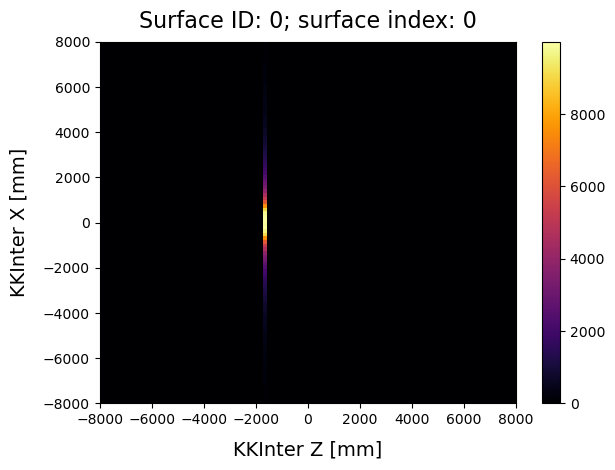


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_ZX_sid0_sindex0.png


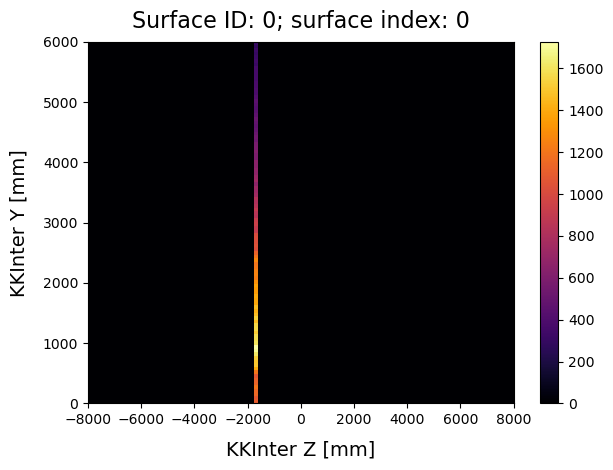


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_ZY_sid0_sindex0.png


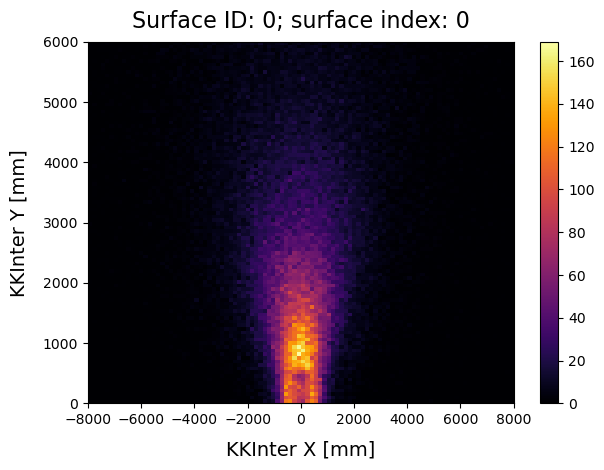


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_XY_sid0_sindex0.png
Input arrays are empty.
Input arrays are empty.
Input arrays are empty.
Input arrays are empty.
Input arrays are empty.
Input arrays are empty.


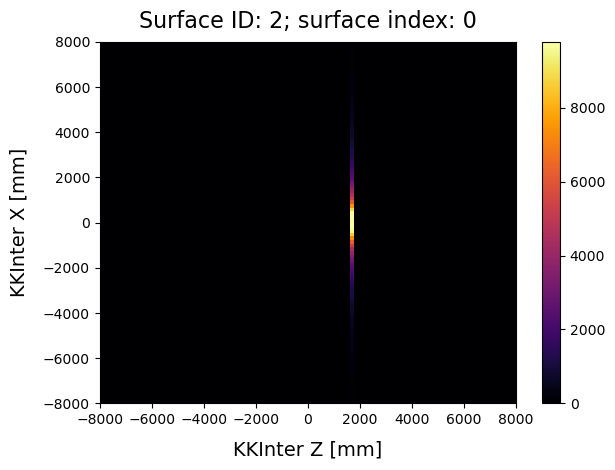


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_ZX_sid2_sindex0.png


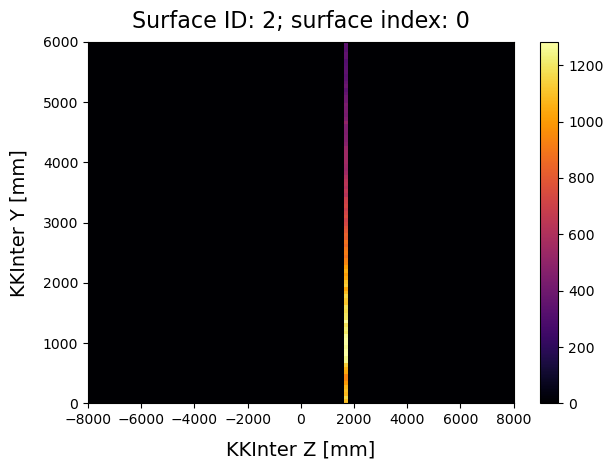


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_ZY_sid2_sindex0.png


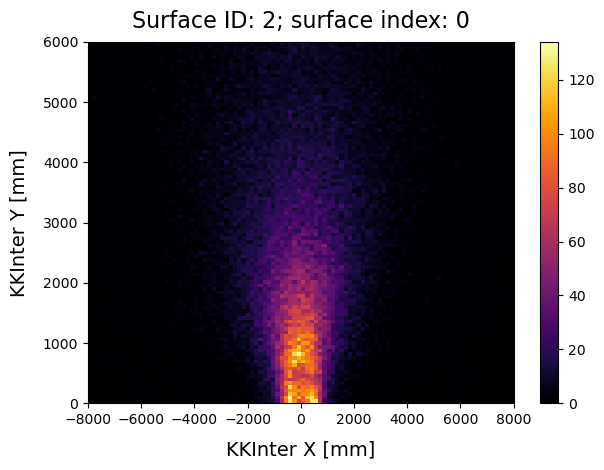


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_XY_sid2_sindex0.png
Input arrays are empty.
Input arrays are empty.
Input arrays are empty.
Input arrays are empty.
Input arrays are empty.
Input arrays are empty.


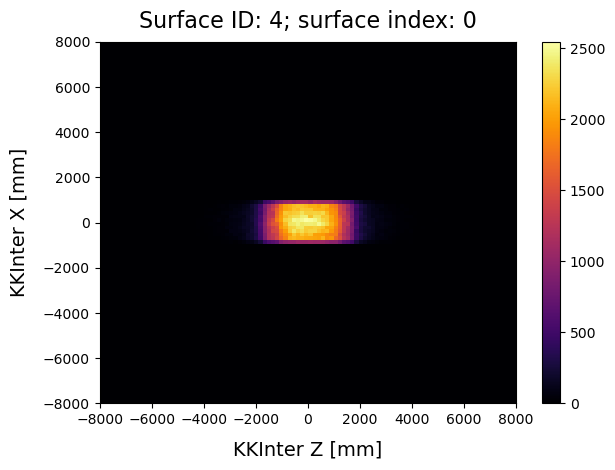


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_ZX_sid4_sindex0.png


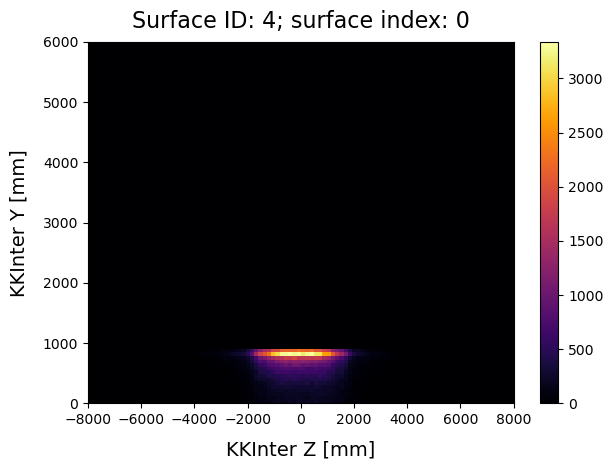


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_ZY_sid4_sindex0.png


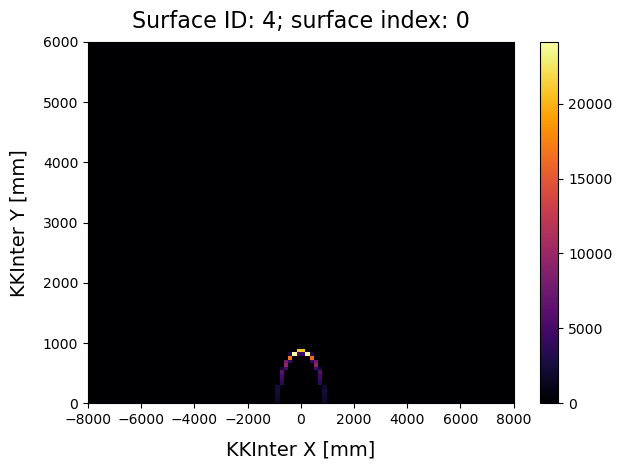


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_XY_sid4_sindex0.png
Input arrays are empty.
Input arrays are empty.
Input arrays are empty.
Input arrays are empty.
Input arrays are empty.
Input arrays are empty.


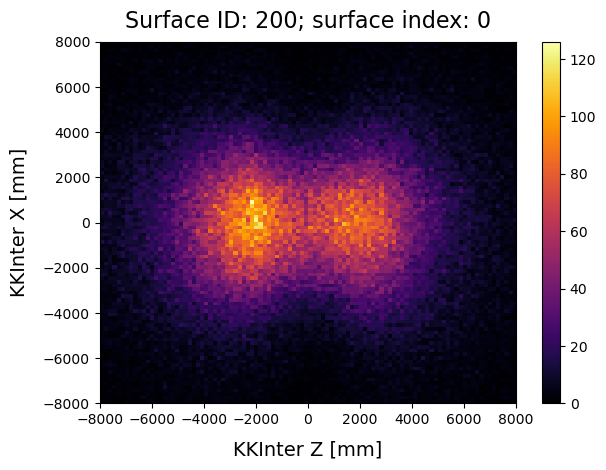


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_ZX_sid200_sindex0.png


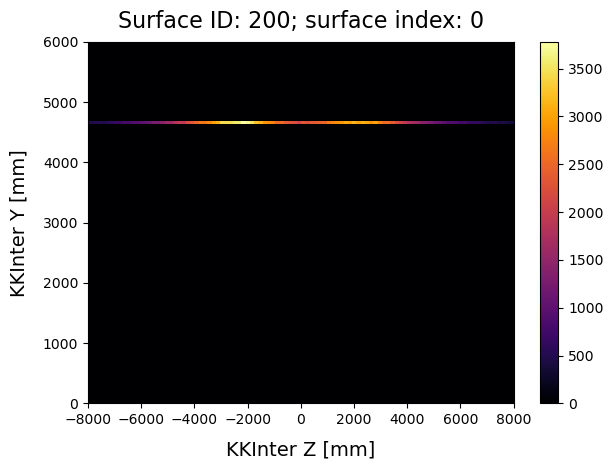


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_ZY_sid200_sindex0.png


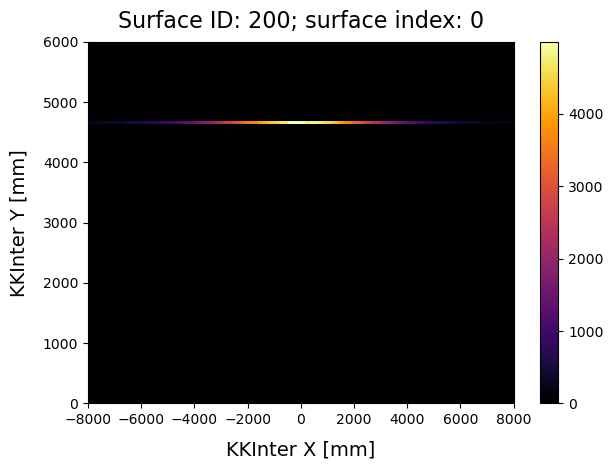


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_XY_sid200_sindex0.png


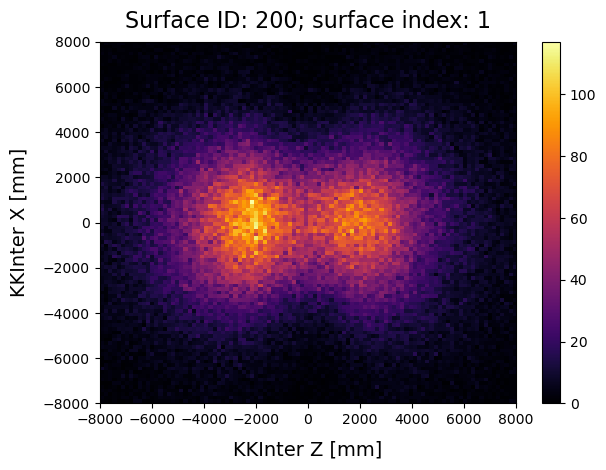


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_ZX_sid200_sindex1.png


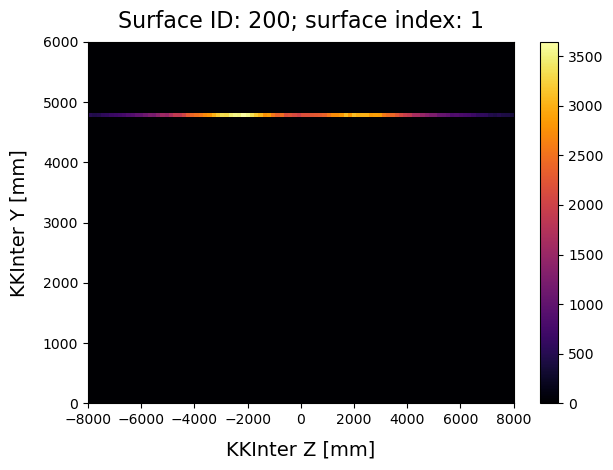


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_ZY_sid200_sindex1.png


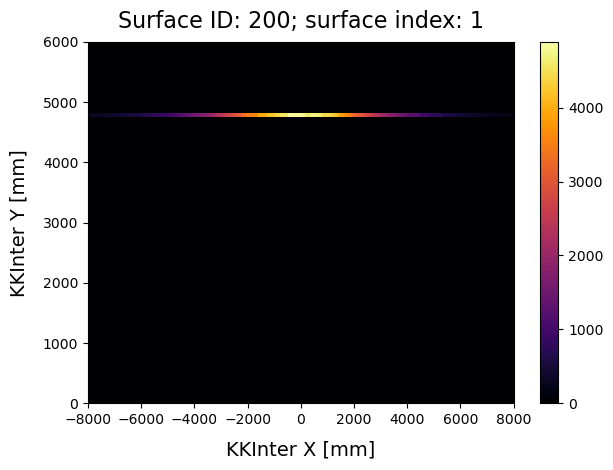


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_XY_sid200_sindex1.png


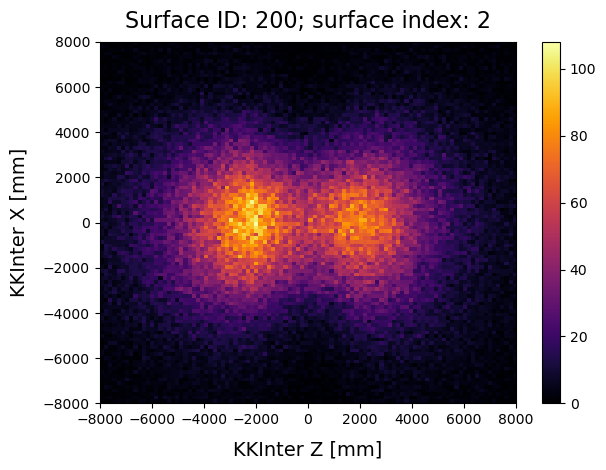


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_ZX_sid200_sindex2.png


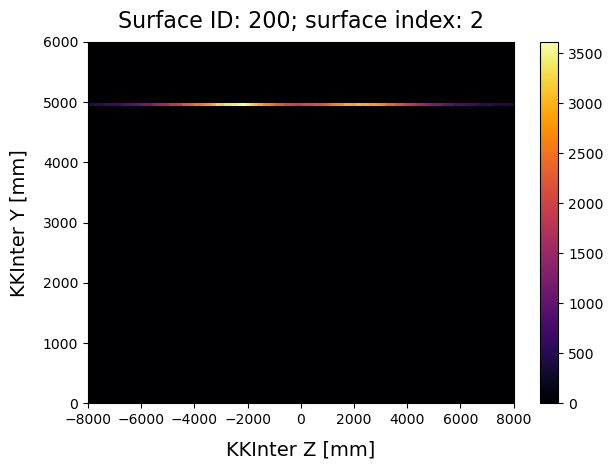


---> Written:
	 ../Images/MDC2020ae/TrackCuts/h2_ZY_sid200_sindex2.png


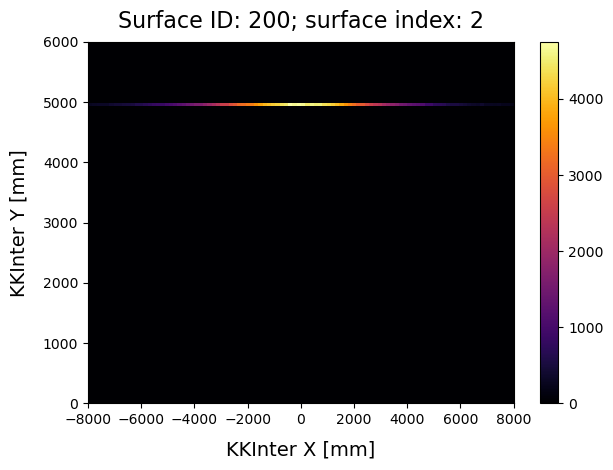


---> Written:
	 ../Images/MDC2020ae/TrackCuts//h2_XY_sid200_sindex2.png


In [16]:
'''
SID, sindex
Just to understand how this works.
'''

length=-1

for sid in [0, 2, 4, 200]:
    for sindex in [0, 1, 2]:
    
        sid_ = ak.copy(data_)
        # sid=200
        # sindex=1

        sid_["trkfit"] = sid_["trkfit"][(sid_["trkfit"]["klfit"]["sid"] == sid) & (sid_["trkfit"]["klfit"]["sindex"] == sindex)]

        # ut.PrintNEvents(sid_, 1)
        
        Plot2D(x=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
                 , y=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
                 , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
                 # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
                 , title=f"Surface ID: {sid}; surface index: {sindex}", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
                 , fout=f"../Images/{recon}/TrackCuts//h2_ZX_sid{sid}_sindex{sindex}.png")
        
        Plot2D(x=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
                 , y=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[:length]
                 , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
                 # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
                 , title=f"Surface ID: {sid}; surface index: {sindex}", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
                 , fout=f"../Images/{recon}/TrackCuts/h2_ZY_sid{sid}_sindex{sindex}.png")
        
        Plot2D(x=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
                 , y=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[:length]
                 , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
                 # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
                 , title=f"Surface ID: {sid}; surface index: {sindex}", xlabel="KKInter X [mm]", ylabel="KKInter Y [mm]"
                 , fout=f"../Images/{recon}/TrackCuts//h2_XY_sid{sid}_sindex{sindex}.png")

In [17]:
# # Find CRV-T fiducial area

# sector1Condition = data_["crv"]["crvcoincs.sectorType"] == 2

# xCRVT = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fX"][sector1Condition], axis=None)
# zCRVT = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sector1Condition], axis=None) 

# min_box_coords = (np.min(zCRVT), np.min(xCRVT))
# max_box_coords = (np.max(zCRVT), np.max(xCRVT))

# print(f"min_coords = ({np.min(zCRVT)}, {np.min(xCRVT)})")
# print(f"max_coords = ({np.max(zCRVT)}, {np.max(xCRVT)})")

# Plot1D(zCRVT
#        , nbins=100, xmin=-8000, xmax=8000
#        , xlabel="CRV Z [mm]", ylabel="Coincidences"
#        , fout=f"../Images/{recon}/TrackCuts/h1_crvZ_raw.png")

# Plot1D(xCRVT
#        , nbins=100, xmin=-8000, xmax=8000
#        , xlabel="CRV X [mm]", ylabel="Coincidences"
#        , fout=f"../Images/{recon}/TrackCuts/h1_crvX_raw.png")

# outputStr = f"""
#             "min = {np.min(zCRVT)}"
#             "max = {np.max(zCRVT)}"
#             """
# print(outputStr)

# # Plot2D(x=xCRVT, y=zCRVT
# #        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
# #        , min_box_coords=min_box_coords, max_box_coords=max_box_coords
# #        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
# #        , title="Raw", xlabel="CRV Z [mm]", ylabel="CRV X [mm]"
# #        , fout=f"../Images/{recon}/TrackCuts/h2_crvZX_raw.png", log=False)
# # 826/2

# #   arrays_["trkfit_CRV2Fiducial"] = ( 
# #         (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"]) < 826/2)
# #         & (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"] + 500) < 2570/2) 

      
# min_box_coords = (-826/2-500, -2570/2)
# max_box_coords = (826/2-500, 2570/2)

# Plot2D(x=zCRVT, y=xCRVT
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        , min_box_coords=min_box_coords, max_box_coords=max_box_coords
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="CRV-T: four module box", xlabel="CRV Z [mm]", ylabel="CRV X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_crvZX_four_modules.png", log=False)

# # CRV-T module overall length 6100 mm
# # CRV-T module overall width 951.0 mm 
# # Total layer offset 42.00*(4-1) = 127 mm
# # Four modules side-by-side w_tot = w + (N-1)*(w-off) = 951 + (4-1)*(951-127) = 3423.0
# # Are there really four in this model?
# # 951.0 + (2-1)*(951-127) = 3423.0

# min_box_coords = (-1775.0-500, -6100/2)
# max_box_coords = (1775.0-500, 6100/2)

# Plot2D(x=zCRVT, y=xCRVT
#        , nbinsX=100, xmin=-4000, xmax=4000, nbinsY=100, ymin=-4000, ymax=4000
#        , min_box_coords=min_box_coords, max_box_coords=max_box_coords
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="CRV-T (two modules)", xlabel="CRV Z [mm]", ylabel="CRV X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_crvT_ZX_two_modules.png", log=False)

# Plot2D(x=zCRVT, y=xCRVT
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        , min_box_coords=min_box_coords, max_box_coords=max_box_coords
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="CRV-T", xlabel="CRV Z [mm]", ylabel="CRV X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_crvZX_area.png", log=False)


In [18]:
# # Find CRV-DS fiducial area

# sector2Condition = data_["crv"]["crvcoincs.sectorType"] == 2

# length=-1 # 1000
# # Only have position info for Z in DS 
# # xCRVDS = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sectorCondition], axis=None)[:length]
# # xCRVDS = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sectorCondition], axis=None)[:length]
# xCRV = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fX"][sector2Condition], axis=None)[:length]
# yCRV = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fY"][sector2Condition], axis=None)[:length]
# zCRV = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sector2Condition], axis=None)[:length]

# # CRV-DS length (z) = 2570 mm
# # CRV-DS width (x) = 826 mm 
# # Total layer offset, off = 42.00*(4-1) = 127 mm
# # 2 modules w_tot = w_mod + (N_mod-1)*(w_mod-off) 
# # Total width (x) = 826 + (2-1)*(826-127) = 1525
# # -500 offset in z

# l=2570
# n_mod = 1
# w_mod = 826
# off = 127
# w_tot = w_mod + (n_mod-1)*(w_mod-off)

# min_box_coords = (-(l/2)-500, -(w_tot))
# max_box_coords = (+(l/2)-500, +(w_tot))

# Plot2D(x=zCRV, y=xCRV
#        , nbinsX=100, xmin=-4000, xmax=4000, nbinsY=100, ymin=-4000, ymax=4000
#        , min_box_coords=min_box_coords, max_box_coords=max_box_coords
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="CRV-DS (one module)", xlabel="CRV Z [mm]", ylabel="CRV X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_crvDS_ZX_one_module.png", log=False)

In [19]:
# '''
# SID 0
# '''

# length=1e4

# sid_ = ak.copy(data_)
# sid=0
# sid_["trkfit"] = sid_["trkfit"][(sid_["trkfit"]["klfit"]["sid"] == sid)]

# ut.PrintNEvents(sid_, 1)

# Plot2D(x=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
#          , y=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title=f"Surface ID: {sid}", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#          , fout=f"../Images/{recon}/TrackCuts//h2_ZX_sid{sid}.png")

# Plot2D(x=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
#          , y=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[:length]
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title=f"Surface ID: {sid}", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#          , fout=f"../Images/{recon}/TrackCuts/h2_ZY_sid{sid}.png")

# Plot2D(x=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
#          , y=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[:length]
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title=f"Surface ID: {sid}", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#          , fout=f"../Images/{recon}/TrackCuts//h2_XY_sid{sid}.png")

In [20]:
# '''
# SID 2 
# '''

# length=1e4

# sid_ = ak.copy(data_)
# sid=2
# sid_["trkfit"] = sid_["trkfit"][(sid_["trkfit"]["klfit"]["sid"] == sid)]

# ut.PrintNEvents(sid_, 1)

# Plot2D(x=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
#          , y=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title=f"Surface ID: {sid}", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#          , fout=f"../Images/{recon}/TrackCuts//h2_ZX_sid{sid}.png")

# Plot2D(x=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
#          , y=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[:length]
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title=f"Surface ID: {sid}", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#          , fout=f"../Images/{recon}/TrackCuts/h2_ZY_sid{sid}.png")

# Plot2D(x=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
#          , y=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[:length]
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title=f"Surface ID: {sid}", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#          , fout=f"../Images/{recon}/TrackCuts//h2_XY_sid{sid}.png")

In [21]:
# '''
# SID 4
# '''

# length=1e4

# sid_ = ak.copy(data_)
# sid=4
# sid_["trkfit"] = sid_["trkfit"][(sid_["trkfit"]["klfit"]["sid"] == sid)]

# ut.PrintNEvents(sid_, 1)

# Plot2D(x=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
#          , y=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title=f"Surface ID: {sid}", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#          , fout=f"../Images/{recon}/TrackCuts//h2_ZX_sid{sid}.png")

# Plot2D(x=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
#          , y=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[:length]
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title=f"Surface ID: {sid}", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#          , fout=f"../Images/{recon}/TrackCuts/h2_ZY_sid{sid}.png")

# Plot2D(x=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
#          , y=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[:length]
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title=f"Surface ID: {sid}", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#          , fout=f"../Images/{recon}/TrackCuts//h2_XY_sid{sid}.png")

In [22]:
# '''
# SID 200
# '''

# length=1e4

# sid_ = ak.copy(data_)
# sid=200
# sid_["trkfit"] = sid_["trkfit"][(sid_["trkfit"]["klfit"]["sid"] == sid)]

# ut.PrintNEvents(sid_, 1)

# Plot2D(x=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
#          , y=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title=f"Surface ID: {sid}", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#          , fout=f"../Images/{recon}/TrackCuts//h2_ZX_sid{sid}.png")

# Plot2D(x=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[:length]
#          , y=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[:length]
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title=f"Surface ID: {sid}", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#          , fout=f"../Images/{recon}/TrackCuts/h2_ZY_sid{sid}.png")

# Plot2D(x=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[:length]
#          , y=ak.flatten(sid_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[:length]
#          , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#          # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#          , title=f"Surface ID: {sid}", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#          , fout=f"../Images/{recon}/TrackCuts//h2_XY_sid{sid}.png")

In [23]:
# # Original track cuts function
# def OriginalApplyTrackerCuts(arrays_, fail=False, quiet=False):
    
#     if not quiet: print(f"\n---> Applying tracker cuts") 
    
#     arrays_["trkfit_KLCRV1"] = ( 
#         (arrays_["trkfit"]["klfit"]["sid"] == 200) 
#         & (arrays_["trkfit"]["klfit"]["sindex"] == 1) )

#     arrays_["trk_bestFit"] = ( 
#         (arrays_["trk"]["kl.ndof"] >= 10)
#         & (arrays_["trk"]["kl.fitcon"] > 0.1)
#         & ((arrays_["trk"]["kl.nactive"]/arrays_["trk"]["kl.nhits"]) > 0.99)
#         & (arrays_["trk"]["kl.nplanes"] >= 4)
#         & ((arrays_["trk"]["kl.nnullambig"]/arrays_["trk"]["kl.nhits"]) < 0.2) )
    
#     arrays_["trkfit_bestFit"] = ( 
#         (arrays_["trkfit"]["klkl"]["z0err"] < 1) 
#         & (arrays_["trkfit"]["klkl"]["d0err"] < 1) 
#         & (arrays_["trkfit"]["klkl"]["thetaerr"] < 0.004)
#         & (arrays_["trkfit"]["klkl"]["phi0err"] < 0.001) )

#     # Apply cuts on the track and track fit level
#     if not fail: 
#         arrays_["trkfit"] = arrays_["trkfit"][(arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"])]
#         arrays_["trk"] = arrays_["trk"][arrays_["trk_bestFit"]]
#     else: 
#         arrays_["trkfit"] = arrays_["trkfit"][~(arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"])]
#         arrays_["trk"] = arrays_["trk"][~arrays_["trk_bestFit"]]

#     # These cuts are applied to trk and trkfit, events that fail will now have no track cut informatio.
#     # Mark events which still have tracks or track fits after cuts

#     arrays_["goodTrk"] = ak.any(arrays_["trk"]["kl.status"], axis=1, keepdims=False) > 0 
#     arrays_["goodTrkFit"] = (
#         (ak.count(arrays_["trkfit"]["klfit"]["sid"], axis=-1, keepdims=False) > 0) 
#         & (ak.count(arrays_["trkfit"]["klkl"]["z0err"], axis=-1, keepdims=False) > 0) )
    
#     # Reset to event level
#     arrays_["goodTrkFit"] = ak.any(arrays_["goodTrkFit"], axis=-1, keepdims=False) == True 

#     # Mark total track cuts
#     arrays_["pass_track_cuts"] = (arrays_["goodTrk"] & arrays_["goodTrkFit"])

#     # Return events passing/failing track fits
#     if not fail:  
#         return arrays_[arrays_["pass_track_cuts"]]
#     else:
#         return arrays_[~arrays_["pass_track_cuts"]]

In [24]:
# # # Corrected track cuts function
# # '''
# # Original does not seem to work properly, it still returns events with no track information after cuts.
# # Also, we do NOT want to apply and event level cut based on the track fit objects.
# # Take care with the local fit parameters. What we return depends on pass/fail.

# # If we "fail" 

# # '''

# # def ApplyTrackerCuts(arrays_, fail=False, quiet=False):
    
# #     if not quiet: print(f"\n---> Applying tracker cuts") 

# #     # Mark cuts on the track and track fit level
# #     arrays_["trkfit_KLCRV1"] = ( 
# #         (arrays_["trkfit"]["klfit"]["sid"] == 200) 
# #         & (arrays_["trkfit"]["klfit"]["sindex"] == 1) )

# #     arrays_["trk_bestFit"] = ( 
# #         (arrays_["trk"]["kl.ndof"] >= 10)
# #         & (arrays_["trk"]["kl.fitcon"] > 0.1)
# #         & ((arrays_["trk"]["kl.nactive"]/arrays_["trk"]["kl.nhits"]) > 0.99)
# #         & (arrays_["trk"]["kl.nplanes"] >= 4)
# #         & ((arrays_["trk"]["kl.nnullambig"]/arrays_["trk"]["kl.nhits"]) < 0.2) )
    
# #     arrays_["trkfit_bestFit"] = ( 
# #         (arrays_["trkfit"]["klkl"]["z0err"] < 1) 
# #         & (arrays_["trkfit"]["klkl"]["d0err"] < 1) 
# #         & (arrays_["trkfit"]["klkl"]["thetaerr"] < 0.004)
# #         & (arrays_["trkfit"]["klkl"]["phi0err"] < 0.001) )

# #     if not fail: 
# #         # Create masks
# #         arrays_["trkfit"] = arrays_["trkfit"][(arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"])]
# #         arrays_["trk"] = arrays_["trk"][arrays_["trk_bestFit"]]
# #         # Check for a track in the event after cuts.
# #         passTrk = ak.any(arrays_["trk"]["kl.status"], axis=1, keepdims=False) > 0 
# #         # Check for a track fit in the event after cuts
# #         passTrkFit = (
# #             (ak.count(arrays_["trkfit"]["klfit"]["sid"], axis=-1, keepdims=False) > 0) 
# #             & (ak.count(arrays_["trkfit"]["klkl"]["z0err"], axis=-1, keepdims=False) > 0) )
# #         # Reset to event level
# #         passTrkFit = ak.any(passTrkFit, axis=-1, keepdims=False) == True 
# #         # Mark total track cuts
# #         arrays_["pass_track_cuts"] = (passTrk & passTrkFit)
# #         # Return events
# #         return arrays_[arrays_["pass_track_cuts"]]
# #     else: 
# #         # Create masks
# #         arrays_["trkfit"] = arrays_["trkfit"][~(arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"])]
# #         arrays_["trk"] = arrays_["trk"][~arrays_["trk_bestFit"]]
# #         # Check for a track in the event after cuts.
# #         arrays_["fail_trk"] = ak.any(arrays_["trk"]["kl.status"], axis=1, keepdims=False) > 0 
# #        # Check for a track fit in the event after cuts
# #         arrays_["fail_trkfit"] = (
# #             (ak.count(arrays_["trkfit"]["klfit"]["sid"], axis=-1, keepdims=False) > 0) 
# #             & (ak.count(arrays_["trkfit"]["klkl"]["z0err"], axis=-1, keepdims=False) > 0) )

# #     # Check for a track in the event after cuts.
# #     arrays_["good_track"] = ak.any(arrays_["trk"]["kl.status"], axis=1, keepdims=False) > 0 

# #     # Return events that sill contain tracks after passing/failing cuts.
# #     return arrays_[arrays_["has_track"]]

# # Corrected track cuts function
# '''

# Take care with the local fit parameters. What we return depends on pass/fail.

# If we "fail" 

# '''

# def OriginalApplyTrackerCuts2(arrays_, fail=False, quiet=False):
    
#     if not quiet: print(f"\n---> Applying tracker cuts") 

#     # Mark cuts on the track and track fit level
#     arrays_["trkfit_KLCRV1"] = ( 
#         (arrays_["trkfit"]["klfit"]["sid"] == 200) 
#         & (arrays_["trkfit"]["klfit"]["sindex"] == 1) )

#     arrays_["trk_bestFit"] = ( 
#         (arrays_["trk"]["kl.ndof"] >= 10)
#         & (arrays_["trk"]["kl.fitcon"] > 0.1)
#         & ((arrays_["trk"]["kl.nactive"]/arrays_["trk"]["kl.nhits"]) > 0.99)
#         & (arrays_["trk"]["kl.nplanes"] >= 4)
#         & ((arrays_["trk"]["kl.nnullambig"]/arrays_["trk"]["kl.nhits"]) < 0.2) )
    
#     arrays_["trkfit_bestFit"] = ( 
#         (arrays_["trkfit"]["klkl"]["z0err"] < 1) 
#         & (arrays_["trkfit"]["klkl"]["d0err"] < 1) 
#         & (arrays_["trkfit"]["klkl"]["thetaerr"] < 0.004)
#         & (arrays_["trkfit"]["klkl"]["phi0err"] < 0.001) )

#     if not fail: 
#         # Create masks
#         arrays_["trkfit"] = arrays_["trkfit"][(arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"])]
#         arrays_["trk"] = arrays_["trk"][arrays_["trk_bestFit"]]
#     else: 
#         # Create masks
#         arrays_["trkfit"] = arrays_["trkfit"][~(arrays_["trkfit_bestFit"] & arrays_["trkfit_KLCRV1"])]
#         arrays_["trk"] = arrays_["trk"][~arrays_["trk_bestFit"]]

#     # Check for a track in the event after cuts.
#     trkCut = ak.any(arrays_["trk"]["kl.status"], axis=1, keepdims=False) > 0 
#     # Check for a track fit in the event after cuts
#     trkFitCut = (
#         (ak.count(arrays_["trkfit"]["klfit"]["sid"], axis=-1, keepdims=False) > 0) 
#         & (ak.count(arrays_["trkfit"]["klkl"]["z0err"], axis=-1, keepdims=False) > 0) )
    
#     # Reset to event level
#     trkFitCut = ak.any(trkFitCut, axis=-1, keepdims=False) == True 

#     # Both do the same thing, but mark them pass/fail for bookkeeping.
#     if not fail: 
#         arrays_["pass_track_cuts"] = (trkCut & trkFitCut)
#         return arrays_[arrays_["pass_track_cuts"]]
#     else: 
#         arrays_["fail_track_cuts"] = (trkCut & trkFitCut)
#         return arrays_[arrays_["fail_track_cuts"]]

In [25]:
# # Find CRV-L-end fiducial area

# sector3Condition = data_["crv"]["crvcoincs.sectorType"] == 3

# length=-1 #1000
# # Only have position info for Z in DS 
# # xCRVDS = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sectorCondition], axis=None)[:length]
# # xCRVDS = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sectorCondition], axis=None)[:length]
# xCRV = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fX"][sector3Condition], axis=None)[:length]
# yCRV = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fY"][sector3Condition], axis=None)[:length]
# zCRV = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sector3Condition], axis=None)[:length]

# # CRV-L-end length (x) = 3388 mm
# # CRV-L-end width (z) = 951 mm 
# # Total layer offset, off = 42.00*(4-1) = 127 mm
# # 2 modules w_tot = w_mod + (N_mod-1)*(w_mod-off) 
# # -500 offset in z

# l=3388
# n_mod = 1
# w_mod = 951
# off = 127
# w_tot = w_mod + (n_mod-1)*(w_mod-off)

# min_box_coords = (-(w_tot)-500, -(l/2))
# max_box_coords = (+(w_tot)-500, +(l/2))

# Plot2D(x=zCRV, y=xCRV
#        , nbinsX=100, xmin=-4000, xmax=4000, nbinsY=100, ymin=-4000, ymax=4000
#        , min_box_coords=min_box_coords, max_box_coords=max_box_coords
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="CRV-L-end (one module)", xlabel="CRV Z [mm]", ylabel="CRV X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_crvL_ZX_one_module.png", log=False)

In [26]:
# # Find CRV-DS fiducial area

# sector3Condition = data_["crv"]["crvcoincs.sectorType"] == 3
# sector2Condition = data_["crv"]["crvcoincs.sectorType"] == 2

# length=-1 # 1000
# # Only have position info for Z in DS 
# # xCRVDS = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sectorCondition], axis=None)[:length]
# # xCRVDS = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sectorCondition], axis=None)[:length]
# xCRV = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fX"][sector2Condition | sector3Condition], axis=None)[:length]
# yCRV = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fY"][sector2Condition | sector3Condition], axis=None)[:length]
# zCRV = ak.flatten(data_["crv"]["crvcoincs.pos.fCoordinates.fZ"][sector2Condition | sector3Condition], axis=None)[:length]


# # CRV-L-end length = 3388 mm
# # CRV-L-end width = 951 mm 
# # CRV-DS length = 2570 mm
# # CRV-DS width = 826 mm 

# # CRV-DS is rotated. length -> width. 
# # z: width for CRV-L
# # z: length for CRV-DS
# # x: width for CRV-DS
# # x: length for CRV-L

# # Total layer offset, off = 42.00*(4-1) = 127 mm
# # 2 modules w_tot = w_mod + (N_mod-1)*(w_mod-off) 
# # -500 offset in z

# # In x:
# # CRV-L-end width < CRV-DS length

# # In z:
# # CRV-L-end length > CRV-DS width

# # So the box is defined by:
# # x: CRV-DS length
# # z: CRV-L-end length

# l=3388
# n_mod = 1
# w_mod = 951
# off = 127
# w_tot = w_mod + (n_mod-1)*(w_mod-off)

# # should be (z, x)
# min_box_coords = (-(2570/2)-500, -(3388/2))
# max_box_coords = (+(2570/2)-500, +(3388/2))

# Plot2D(x=zCRV, y=xCRV
#        , nbinsX=100, xmin=-4000, xmax=4000, nbinsY=100, ymin=-4000, ymax=4000
#        , min_box_coords=min_box_coords, max_box_coords=max_box_coords, box_colour="r"
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Trigger modules", xlabel="CRV Z [mm]", ylabel="CRV X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_crvTrigger_ZX.png", log=True)


In [27]:
# # track_cuts_old_ = ak.copy(data_)
# # track_cuts_old_ = OriginalApplyTrackerCuts(track_cuts_old_, fail=True)

# # track_cuts_fail_old_ = ak.copy(data_)
# # track_cuts_faulold_ = OriginalApplyTrackerCuts(track_cuts_old_, fail=True)

# track_cuts_test_ = ak.copy(data_)
# track_cuts_test_ = ApplyTrackerCuts(track_cuts_test_, fail=False)

# track_cuts_fail_test_ = ak.copy(data_)
# track_cuts_fail_test_ = ApplyTrackerCuts(track_cuts_fail_test_, fail=True)

# pr.PrintNEvents(track_cuts_test_, 1, ["trkfit_CRV1Fiducial"])
# pr.PrintNEvents(track_cuts_fail_test_, 1,  ["trkfit_CRV1Fiducial"])

In [28]:
# # Filters
# filters_ = { 
#     0 : "singles"
#     , 1 : "track_cuts"
#     , 2 : "singles_track_cuts"
#     # , 3 : "pass_singles_fail_track_cuts" # this is where the supposed improvement comes in. 
#     , 4 : "fail_singles_pass_track_cuts"
#     , 5 : "fail_singles_fail_track_cuts"
# }

In [29]:
# '''
# Track cuts (CRV-T coinc)
# '''

# track_cuts_CRVT_ = ak.copy(data_)
# track_cuts_CRVT_ = ApplyTrackerCuts(track_cuts_CRVT_)
# track_cuts_CRVT_["crv"] = track_cuts_CRVT_["crv"][track_cuts_CRVT_["crv"]["crvcoincs.sectorType"] == 1]

# # Now remove events with no coincidence
# # We actually do not do this directly in main code, although I do trigger which should do it?
# goodCRV =  ak.any(track_cuts_CRVT_["crv"]["crvcoincs.nHits"], axis=1, keepdims=False) > 0
# track_cuts_CRVT_ = track_cuts_CRVT_[goodCRV]

# ut.PrintNEvents(track_cuts_CRVT_, 1)

# Plot2D(x=ak.flatten(track_cuts_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts (CRV-T coincs)", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZX_track_cuts_CRVT.png")

# Plot2D(x=ak.flatten(track_cuts_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts (CRV-T coincs)", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZY_track_cuts_CRVT.png")

# Plot2D(x=ak.flatten(track_cuts_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts (CRV-T coincs)", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_XY_track_cuts_CRVT.png")

In [30]:
# '''
# Fail track cuts only
# '''

# track_cuts_fail_ = ak.copy(data_)
# track_cuts_fail_ = ApplyTrackerCuts(track_cuts_fail_, fail=True)

# # These don't actually add up. 
# # Total < passing + failing 
# # How does this happen, we must have some events in both camps. Can look at this. 

# n_tot = len(ak.flatten(data_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None))
# n_pass = len(ak.flatten(track_cuts_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None))
# n_fail = len(ak.flatten(track_cuts_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None))

# print(f"Total track fits = {n_tot}")
# print(f"Passing track fits = {n_pass}")
# print(f"Failing track fits = {n_fail}")

# if (n_tot == (n_pass + n_fail)): 
#     print("total = passing + failing")
# else:
#     print("total != passing + failing")
    
# ut.PrintNEvents(track_cuts_fail_, 1)

# Plot2D(x=ak.flatten(track_cuts_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts (fail)", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZX_track_cuts_fail.png")

# Plot2D(x=ak.flatten(track_cuts_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts (fail)", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts//h2_ZY_track_cuts_fail.png")

# Plot2D(x=ak.flatten(track_cuts_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts (fail)", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts//h2_XY_track_cuts_fail.png")

In [31]:
# Interesting event
# pr.PrintNEvents(data_[(raw_data_["evt"]["evtinfo.run"] == 1205) & (data_["evt"]["evtinfo.subrun"] == 6) & (data_["evt"]["evtinfo.event"] == 6837)])
# print(track_cuts_[(track_cuts_["evt"]["evtinfo.run"] == 1205) & (track_cuts_["evt"]["evtinfo.subrun"] == 6) & (track_cuts_["evt"]["evtinfo.event"] == 6837)])
# pr.PrintNEvents(track_cuts_[(track_cuts_["evt"]["evtinfo.run"] == 1205) & (track_cuts_["evt"]["evtinfo.subrun"] == 6) & (track_cuts_["evt"]["evtinfo.event"] == 6837)])
# So it simply does not exist

In [32]:
# '''
# Track cuts fail (CRV-T coinc)

# Essentially meaningless, the CRV cuts are independent of the tracker cuts.
# '''

# track_cuts_fail_CRVT_ = ak.copy(data_)
# track_cuts_fail_CRVT_ = ApplyTrackerCuts(track_cuts_fail_CRVT_, fail=True)
# track_cuts_fail_CRVT_["crv"] = track_cuts_fail_CRVT_["crv"][track_cuts_fail_CRVT_["crv"]["crvcoincs.sectorType"] == 1]

# # Now remove events with no coincidence
# # We actually do not do this directly in main code, although I do trigger which should do it?
# goodCRV =  ak.any(track_cuts_fail_CRVT_["crv"]["crvcoincs.nHits"], axis=1, keepdims=False) > 0
# track_cuts_fail_CRVT_ = track_cuts_fail_CRVT_[goodCRV]

# ut.PrintNEvents(track_cuts_fail_CRVT_, 1)

# Plot2D(x=ak.flatten(track_cuts_fail_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_fail_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts (fail, CRV-T coincs)", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZX_track_cuts_fail_CRVT.png")

# Plot2D(x=ak.flatten(track_cuts_fail_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_fail_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts (fail, CRV-T coincs)", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZY_track_cuts_fail_CRVT.png")

# Plot2D(x=ak.flatten(track_cuts_fail_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_fail_CRVT_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts (fail, CRV-T coincs)", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_XY_track_cuts_fail_CRVT.png")

In [33]:
# pr.PrintNEvents(data_[(data_["evt"]["evtinfo.run"] == 1205) & (data_["evt"]["evtinfo.subrun"] == 6) & (data_["evt"]["evtinfo.event"] == 3776)])

In [34]:
# '''
# Trigger function
# '''

# def Trigger(data_, fail=False, quiet=False): 

#     if not quiet: print(f"\n---> Triggering")
        
#     # Enforce trigger condititon 
#     triggerCondition = (
#         ak.any((data_["crv"]["crvcoincs.sectorType"] == 2), axis=1) &
#         ak.any((data_["crv"]["crvcoincs.sectorType"] == 3), axis=1)
#     )

#     data_["pass_trigger"] = triggerCondition
    
#     if not quiet: print("Done!")

#     if not fail: 
#         return data_[data_["pass_trigger"]]
#     else:
#         return data_[~data_["pass_trigger"]]

In [35]:
# '''
# Triggered
# '''

# # Better to start from scratch each time
# triggered_ = ak.copy(data_)
# triggered_ = Trigger(triggered_)

# ut.PrintNEvents(triggered_, 1)

# Plot2D(x=ak.flatten(triggered_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(triggered_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Triggered", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZX_triggered.png")

# Plot2D(x=ak.flatten(triggered_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(triggered_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Triggered", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZY_triggered.png")

# Plot2D(x=ak.flatten(triggered_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , y=ak.flatten(triggered_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Triggered", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_XY_triggered.png")

In [36]:
# '''
# Singles cut function
# '''

# #  Events with ONE coincidence in sectors 2 & 3 
# #  AND no more than one coincidence in sector 1 (with default coin conditions) 
# def OriginalFilterSingles(arrays_, fail=False, quiet=False):
    
#     if not quiet: print(f"\n---> Filtering singles") 

#     sector1Condition = arrays_["crv"]["crvcoincs.sectorType"] == 1
#     sector2Condition = arrays_["crv"]["crvcoincs.sectorType"] == 2
#     sector3Condition = arrays_["crv"]["crvcoincs.sectorType"] == 3

#     oneOrZeroCoincInMeasurementSector = ak.count(arrays_["crv"]["crvcoincs.sectorType"][sector1Condition], axis=1) < 2
#     oneCoincInSector2Condition = ak.count(arrays_["crv"]["crvcoincs.sectorType"][sector2Condition], axis=1) == 1
#     oneCoincInSector3Condition = ak.count(arrays_["crv"]["crvcoincs.sectorType"][sector3Condition], axis=1) == 1
    
#     arrays_["oneOrZeroCoincInMeasurementSector"] = oneOrZeroCoincInMeasurementSector 
#     arrays_["oneCoinInTriggerSectors"] = (oneCoincInSector2Condition & oneCoincInSector3Condition)

#     # This has to be event level!
#     arrays_["pass_singles"] = (oneOrZeroCoincInMeasurementSector & oneCoincInSector2Condition & oneCoincInSector3Condition)

#     if not quiet: print("Done!")
    
#     # Cut on event level
#     if not fail: 
#         return arrays_[arrays_["pass_singles"]]
#     else: 
#         return arrays_[~arrays_["pass_singles"]]

In [37]:
# '''
# Singles cut function
# '''

# #  Events with ONE coincidence in sectors 2 & 3 
# #  AND no more than one coincidence in sector 1 (with default coin conditions) 
# def FilterSingles(arrays_, fail=False, quiet=False):
    
#     if not quiet: print(f"\n---> Filtering singles") 

#     sector1Condition = arrays_["crv"]["crvcoincs.sectorType"] == 1
#     sector2Condition = arrays_["crv"]["crvcoincs.sectorType"] == 2
#     sector3Condition = arrays_["crv"]["crvcoincs.sectorType"] == 3

#     oneOrZeroCoincInMeasurementSector = ak.count(arrays_["crv"]["crvcoincs.sectorType"][sector1Condition], axis=1) < 2
#     oneCoincInSector2Condition = ak.count(arrays_["crv"]["crvcoincs.sectorType"][sector2Condition], axis=1) == 1
#     oneCoincInSector3Condition = ak.count(arrays_["crv"]["crvcoincs.sectorType"][sector3Condition], axis=1) == 1
    
#     arrays_["oneOrZeroCoincInMeasurementSector"] = oneOrZeroCoincInMeasurementSector 
#     arrays_["oneCoinInTriggerSectors"] = (oneCoincInSector2Condition & oneCoincInSector3Condition)

#     # This is global.
#     arrays_["pass_singles"] = (oneOrZeroCoincInMeasurementSector & oneCoincInSector2Condition & oneCoincInSector3Condition)

#     if not quiet: print("Done!")
    
#     # Cut on event level
#     if not fail: 
#         return arrays_[arrays_["pass_singles"]]
#     else: 
#         return arrays_[~arrays_["pass_singles"]]

In [38]:
# '''
# Triggered singles
# '''

# triggered_singles_ = ak.copy(data_)
# triggered_singles_ = Trigger(triggered_singles_)
# triggered_singles_ = FilterSingles(triggered_singles_)

# ut.PrintNEvents(triggered_singles_, 1)

# Plot2D(x=ak.flatten(triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Triggered, singles", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZX_triggered_singles.png")

# Plot2D(x=ak.flatten(triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Triggered, singles", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZY_triggered_singles.png")

# Plot2D(x=ak.flatten(triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , y=ak.flatten(triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Triggered, singles", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_XY_triggered_singles.png")

In [39]:
# '''
# Triggered singles with track cuts
# '''

# track_cuts_triggered_singles_ = ak.copy(data_)
# track_cuts_triggered_singles_ = Trigger(track_cuts_triggered_singles_)
# track_cuts_triggered_singles_ = FilterSingles(track_cuts_triggered_singles_)
# track_cuts_triggered_singles_ = ApplyTrackerCuts(track_cuts_triggered_singles_)

# ut.PrintNEvents(track_cuts_triggered_singles_, 1)

# Plot2D(x=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts, triggered, singles", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZX_track_cuts_triggered_singles.png")

# Plot2D(x=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts, triggered, singles", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZY_track_cuts_triggered_singles.png"
#        , log=True)

# Plot2D(x=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , y=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts, triggered, singles", xlabel="KKInter X [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_XY_track_cuts_triggered_singles.png")

In [40]:
# '''
# Failures which pass everything. 
# '''

# true_failures_ = ak.copy(data_)
# true_failures_ = Trigger(true_failures_) 
# true_failures_ = FilterSingles(true_failures_)

# def SuccessfulTriggers(data_, success, quiet=False):

#     successStr = ""
#     if success: successStr += "successful"
#     else: successStr += "unsuccessful"

#     if not quiet: print(f"\n---> Getting {successStr} triggers")

#     # Ensure at least one passing coincidence the measurement sector
#     # Coincidence conditions are set in FindCoincidences()
#     successCondition = ak.any(data_["crv"]["crvcoincs.sectorType"], axis=1) == 1
    
#     if not quiet: print("Done!")

#     if success: return data_[successCondition] # successful triggers
#     else: return data_[~successCondition] # unsuccessful triggers


# true_failures_ = SuccessfulTriggers(true_failures_, success=False)
# true_failures_ = ApplyTrackerCuts(true_failures_)

# ut.PrintNEvents(true_failures_, 1)

# # Plot2D(x=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
# #        , y=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
# #        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
# #        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
# #        , title="Track cuts, triggered, singles", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
# #        , fout=f"../Images/{recon}/TrackCuts/h2_ZX_track_cuts_triggered_singles.png")

# # Plot2D(x=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
# #        , y=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
# #        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
# #        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
# #        , title="Track cuts, triggered, singles", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
# #        , fout=f"../Images/{recon}/TrackCuts/h2_ZY_track_cuts_triggered_singles.png"
# #        , log=True)

# # Plot2D(x=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
# #        , y=ak.flatten(track_cuts_triggered_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
# #        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
# #        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
# #        , title="Track cuts, triggered, singles", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
# #        , fout=f"../Images/{recon}/TrackCuts/h2_XY_track_cuts_triggered_singles.png")

In [41]:
# '''
# Fail singles
# '''
# singles_fail_ = ak.copy(data_)
# singles_fail_ = FilterSingles(singles_fail_, fail=True)

# def PrintNEvents(data_, nEvents=10, masks_=[]):
#      # Iterate event-by-event
#     for i, event in enumerate(data_, start=1):
#         maskStr=""
#         for mask in masks_: 
#             maskStr += f"{mask}: {event[f'{mask}']}\n"
#         print(pr.PrintEvent(event, maskStr))
#         if i >= nEvents: 
#             return

# PrintNEvents(singles_fail_, 1, masks_=["pass_singles"])
#         # eventStr += f"pass_singles: {event['pass_singles']}\n")

# Plot2D(x=ak.flatten(singles_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)
#        , y=ak.flatten(singles_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        , title="Singles (fail)", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZX_singles_fail.png")

# Plot2D(x=ak.flatten(singles_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)
#        , y=ak.flatten(singles_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        , title="Singles (fail)", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZY_singles_fail.png")

# Plot2D(x=ak.flatten(singles_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)
#        , y=ak.flatten(singles_fail_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        , title="Singles (fail)", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_XY_singles_fail.png")

In [42]:
# pr.PrintNEvents(data_[(data_["evt"]["evtinfo.run"] == 1205) & (data_["evt"]["evtinfo.subrun"] == 6) & (data_["evt"]["evtinfo.event"] == 229)])

In [43]:
# '''
# Pass singles, fail track
# '''

# fail_track_cuts_pass_singles_ = ak.copy(data_)
# fail_track_cuts_pass_singles_ = FilterSingles(fail_track_cuts_pass_singles_, fail=False)
# fail_track_cuts_pass_singles_ = ApplyTrackerCuts(fail_track_cuts_pass_singles_, fail=True)

# pr.PrintNEvents(fail_track_cuts_pass_singles_, 1, ["pass_singles", "fail_track_cuts", "trk_bestFit", "trkfit_bestFit"]) # track_cuts"])

# print(len(ak.flatten(fail_track_cuts_pass_singles_["evt"]["evtinfo.event"], axis=None)))

# Plot2D(x=ak.flatten(fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts (fail), singles (pass)", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZX_fail_track_cuts_pass_singles_.png")

# Plot2D(x=ak.flatten(fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts (fail), singles (pass)", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZY_fail_track_cuts_pass_singles_.png")

# Plot2D(x=ak.flatten(fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , y=ak.flatten(fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts (fail), singles (pass)", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_XY_fail_track_cuts_pass_singles_.png")

In [44]:
# '''
# Pass singles, fail track, triggered
# '''

# triggered_fail_track_cuts_pass_singles_ = ak.copy(data_)
# triggered_fail_track_cuts_pass_singles_ = Trigger(triggered_fail_track_cuts_pass_singles_)
# triggered_fail_track_cuts_pass_singles_ = FilterSingles(triggered_fail_track_cuts_pass_singles_, fail=False)
# triggered_fail_track_cuts_pass_singles_ = ApplyTrackerCuts(triggered_fail_track_cuts_pass_singles_, fail=True)

# pr.PrintNEvents(triggered_fail_track_cuts_pass_singles_, 1, ["pass_trigger", "pass_singles", "fail_track_cuts", "trk_bestFit", "trkfit_bestFit", "trkfit_KLCRV1"]) # track_cuts"])

# print(len(ak.flatten(triggered_fail_track_cuts_pass_singles_["evt"]["evtinfo.event"], axis=None)))

# Plot2D(x=ak.flatten(triggered_fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(triggered_fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts (fail), singles (pass), triggered", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZX_triggered_fail_track_cuts_pass_singles.png")

# Plot2D(x=ak.flatten(triggered_fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(triggered_fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts (fail), singles (pass), triggered", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZY_triggered_fail_track_cuts_pass_singles.png")

# Plot2D(x=ak.flatten(triggered_fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , y=ak.flatten(triggered_fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Track cuts (fail), singles (pass), triggered", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_XY_triggered_fail_track_cuts_pass_singles.png")

In [45]:
# '''

# Loosen the cuts. 

# I just want any fit that intersects with CRV-T. 

# '''

# def ApplyLooseTrackerCuts(arrays_, fail=False, quiet=False):
    
#     if not quiet: print(f"\n---> Applying tracker cuts") 

#     # Mark cuts on the track and track fit level
#     arrays_["trkfit_KLCRV1"] = ( 
#         (arrays_["trkfit"]["klfit"]["sid"] == 200) 
#         & (arrays_["trkfit"]["klfit"]["sindex"] == 1) )

#     # arrays_["trk_bestFit"] = ( 
#     #     (arrays_["trk"]["kl.ndof"] >= 10)
#     #     & (arrays_["trk"]["kl.fitcon"] > 0.1)
#     #     & ((arrays_["trk"]["kl.nactive"]/arrays_["trk"]["kl.nhits"]) > 0.99)
#     #     & (arrays_["trk"]["kl.nplanes"] >= 4)
#     #     & ((arrays_["trk"]["kl.nnullambig"]/arrays_["trk"]["kl.nhits"]) < 0.2) )
    
#     # arrays_["trkfit_bestFit"] = ( 
#     #     (arrays_["trkfit"]["klkl"]["z0err"] < 1) 
#     #     & (arrays_["trkfit"]["klkl"]["d0err"] < 1) 
#     #     & (arrays_["trkfit"]["klkl"]["thetaerr"] < 0.004)
#     #     & (arrays_["trkfit"]["klkl"]["phi0err"] < 0.001) )


#     # This is just so you can plot the intersection point.
#     if not fail: 
#         # Create masks
#         arrays_["trkfit"] = arrays_["trkfit"][arrays_["trkfit_KLCRV1"]]
#     else: 
#         # Create masks
#         arrays_["trkfit"] = arrays_["trkfit"][~arrays_["trkfit_KLCRV1"]]


# # trkCut = ak.any(arrays_["trk"]["kl.status"], axis=1, keepdims=False) > 0 
# #     # Check for a track fit in the event after cuts
# #     trkFitCut = (
# #         (ak.count(arrays_["trkfit"]["klfit"]["sid"], axis=-1, keepdims=False) > 0) 
# #         & (ak.count(arrays_["trkfit"]["klkl"]["z0err"], axis=-1, keepdims=False) > 0) )


#     # Event level cases where we do not intersect with the CRV-T
#     arrays_["pass_track_cuts"] = ak.any(arrays_["trkfit_KLCRV1"], axis=-1, keepdims=False) == True
#     # Reset to event level. 
#     arrays_["pass_track_cuts"] = ak.any( arrays_["pass_track_cuts"], axis=-1, keepdims=False) == True
    
#     print(arrays_["pass_track_cuts"])

#     # Both do the same thing, but mark them pass/fail for bookkeeping.
#     if not fail: 
#         return arrays_[arrays_["pass_track_cuts"]]
#     else: 
#         return arrays_[~arrays_["pass_track_cuts"]]

In [46]:
# '''
# Pass singles, fail track, triggered

# LOOSE CUTS

# '''

# triggered_fail_track_cuts_pass_singles_ = ak.copy(data_)
# triggered_fail_track_cuts_pass_singles_ = Trigger(triggered_fail_track_cuts_pass_singles_)
# triggered_fail_track_cuts_pass_singles_ = FilterSingles(triggered_fail_track_cuts_pass_singles_, fail=False)
# triggered_fail_track_cuts_pass_singles_ = ApplyLooseTrackerCuts(triggered_fail_track_cuts_pass_singles_, fail=True)

# PrintNEvents(triggered_fail_track_cuts_pass_singles_, 1, ["pass_trigger", "pass_singles", "pass_track_cuts", "trkfit_KLCRV1"]) 

# print(len(ak.flatten(triggered_fail_track_cuts_pass_singles_["evt"]["evtinfo.event"], axis=None)))

# Plot2D(x=ak.flatten(triggered_fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(triggered_fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Loose track cuts (fail), singles (pass), triggered", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZX_triggered_fail_track_cuts_pass_singles_loose.png")

# Plot2D(x=ak.flatten(triggered_fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(triggered_fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Loose track cuts (fail), singles (pass), triggered", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZY_triggered_fail_track_cuts_pass_singles_loose.png")

# Plot2D(x=ak.flatten(triggered_fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , y=ak.flatten(triggered_fail_track_cuts_pass_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Loose track cuts (fail), singles (pass), triggered", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_XY_triggered_fail_track_cuts_pass_singles_loose.png")

In [47]:
# '''
# Pass singles, pass track, triggered

# LOOSE CUTS

# '''

# triggered_loose_track_cuts_singles_ = ak.copy(data_)
# triggered_loose_track_cuts_singles_ = Trigger(triggered_loose_track_cuts_singles_)
# triggered_loose_track_cuts_singles_ = FilterSingles(triggered_loose_track_cuts_singles_, fail=False)
# triggered_loose_track_cuts_singles_ = ApplyLooseTrackerCuts(triggered_loose_track_cuts_singles_, fail=False)

# PrintNEvents(triggered_loose_track_cuts_singles_, 1, ["pass_trigger", "pass_singles", "pass_track_cuts", "trkfit_KLCRV1"]) # track_cuts"])

# print(len(ak.flatten(triggered_loose_track_cuts_singles_["evt"]["evtinfo.event"], axis=None)))

# Plot2D(x=ak.flatten(triggered_loose_track_cuts_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(triggered_loose_track_cuts_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=-8000, ymax=8000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Loose track cuts, singles, triggered", xlabel="KKInter Z [mm]", ylabel="KKInter X [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZX_triggered_pass_loose_track_cutss_singles_loose.png")

# Plot2D(x=ak.flatten(triggered_loose_track_cuts_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)#[:1000]
#        , y=ak.flatten(triggered_loose_track_cuts_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Loose track cuts, singles, triggered", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_ZY_triggered_pass_loose_track_cuts_pass_singles_loose.png")

# Plot2D(x=ak.flatten(triggered_loose_track_cuts_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)#[:1000]
#        , y=ak.flatten(triggered_loose_track_cuts_singles_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)#[:1000]
#        , nbinsX=100, xmin=-8000, xmax=8000, nbinsY=100, ymin=0, ymax=6000
#        # , xbox_= [-crvDS_len/2, crvDS_len/2], ybox_ =  [-crvDS_wid/2, crvDS_wid/2]
#        , title="Loose track cuts, singles, triggered", xlabel="KKInter Z [mm]", ylabel="KKInter Y [mm]"
#        , fout=f"../Images/{recon}/TrackCuts/h2_XY_triggered_pass_loose_track_cuts_pass_singles.png")

In [48]:
# # Inspect a failure
# # tag="001205_00000020"
# run=1205
# subrun=2263
# event=473431
# filename="/exp/mu2e/data/users/sgrant/CRVSim/CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.000/11946817/00/00069/nts.sgrant.CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.001205_00000020.root"
# with uproot.open(filename) as file:
#     # print(file)
#     array_ = ut.GetData(file)
#     array_ = ApplyTrackerCuts(array_)
#     # print(array_)
#     # print(array_["evt"]["evtinfo.event"])
#     # runCondition = ak.any(array_["evt"]["evtinfo.run"] == run, axis=0)
#     # subrunCondition = ak.any(array_["evt"]["evtinfo.subrun"] == subrun, axis=0)
#     # eventCondition = ak.any(array_["evt"]["evtinfo.event"] == event, axis=0)
#     runCondition = array_["evt"]["evtinfo.run"] == run
#     subrunCondition = array_["evt"]["evtinfo.subrun"] == subrun
#     eventCondition = array_["evt"]["evtinfo.event"] == event
#     array_ = array_[runCondition & subrunCondition & eventCondition] 
#     pr.PrintNEvents(array_)
#     print(f'x-position: {ak.flatten(array_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"], axis=None)[0]}')
#     print(f'y-position: {ak.flatten(array_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fY"], axis=None)[0]}')
#     print(f'z-position: {ak.flatten(array_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"], axis=None)[0]}')

In [49]:
# # arrays_["trkfit_CRV1Fiducial"] = ( 
# #         (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fX"]) <= 6100/2)
# #         & (abs(arrays_["trkfit"]["klfit"]["pos"]["fCoordinates"]["fZ"] + 500) <= 1775.0) ) 

# print(f"{-6100/2} <= x <= {6100/2}")
# print(f"{-1775.0-500} <= z <= {1775.0-500}")